# Zero to Hero

## 1.04 Transformado (innecesariamente) las variables

El objetivo de esta sección es analizar el efecto que tiene sobre el arbol de decision
* Variables Colineales
* Normalizacion de Variables
* Transformada logarítmica
* Outliers

In [1]:
rm(list = ls())
gc()

library("data.table") # cargo la libreria  data.table
library("rpart") # cargo la libreria  rpart
library("rpart.plot")

options(repr.plot.width = 20, repr.plot.height = 10)
 


,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,507982,27.2,1140421,61,621911,33.3
Vcells,938187,7.2,8388608,64,1601936,12.3


In [2]:
setwd("D:\\MAESTRIA AUSTRAL DATA SCIENCE\\MATERIAS\\2doSem\\Laboratorio 1\\datasets") # Establezco el Working Directory
# cargo el dataset
dataset <- fread("dataset_pequeno.csv")


Warning message:
"cex and tweak both specified, applying both"

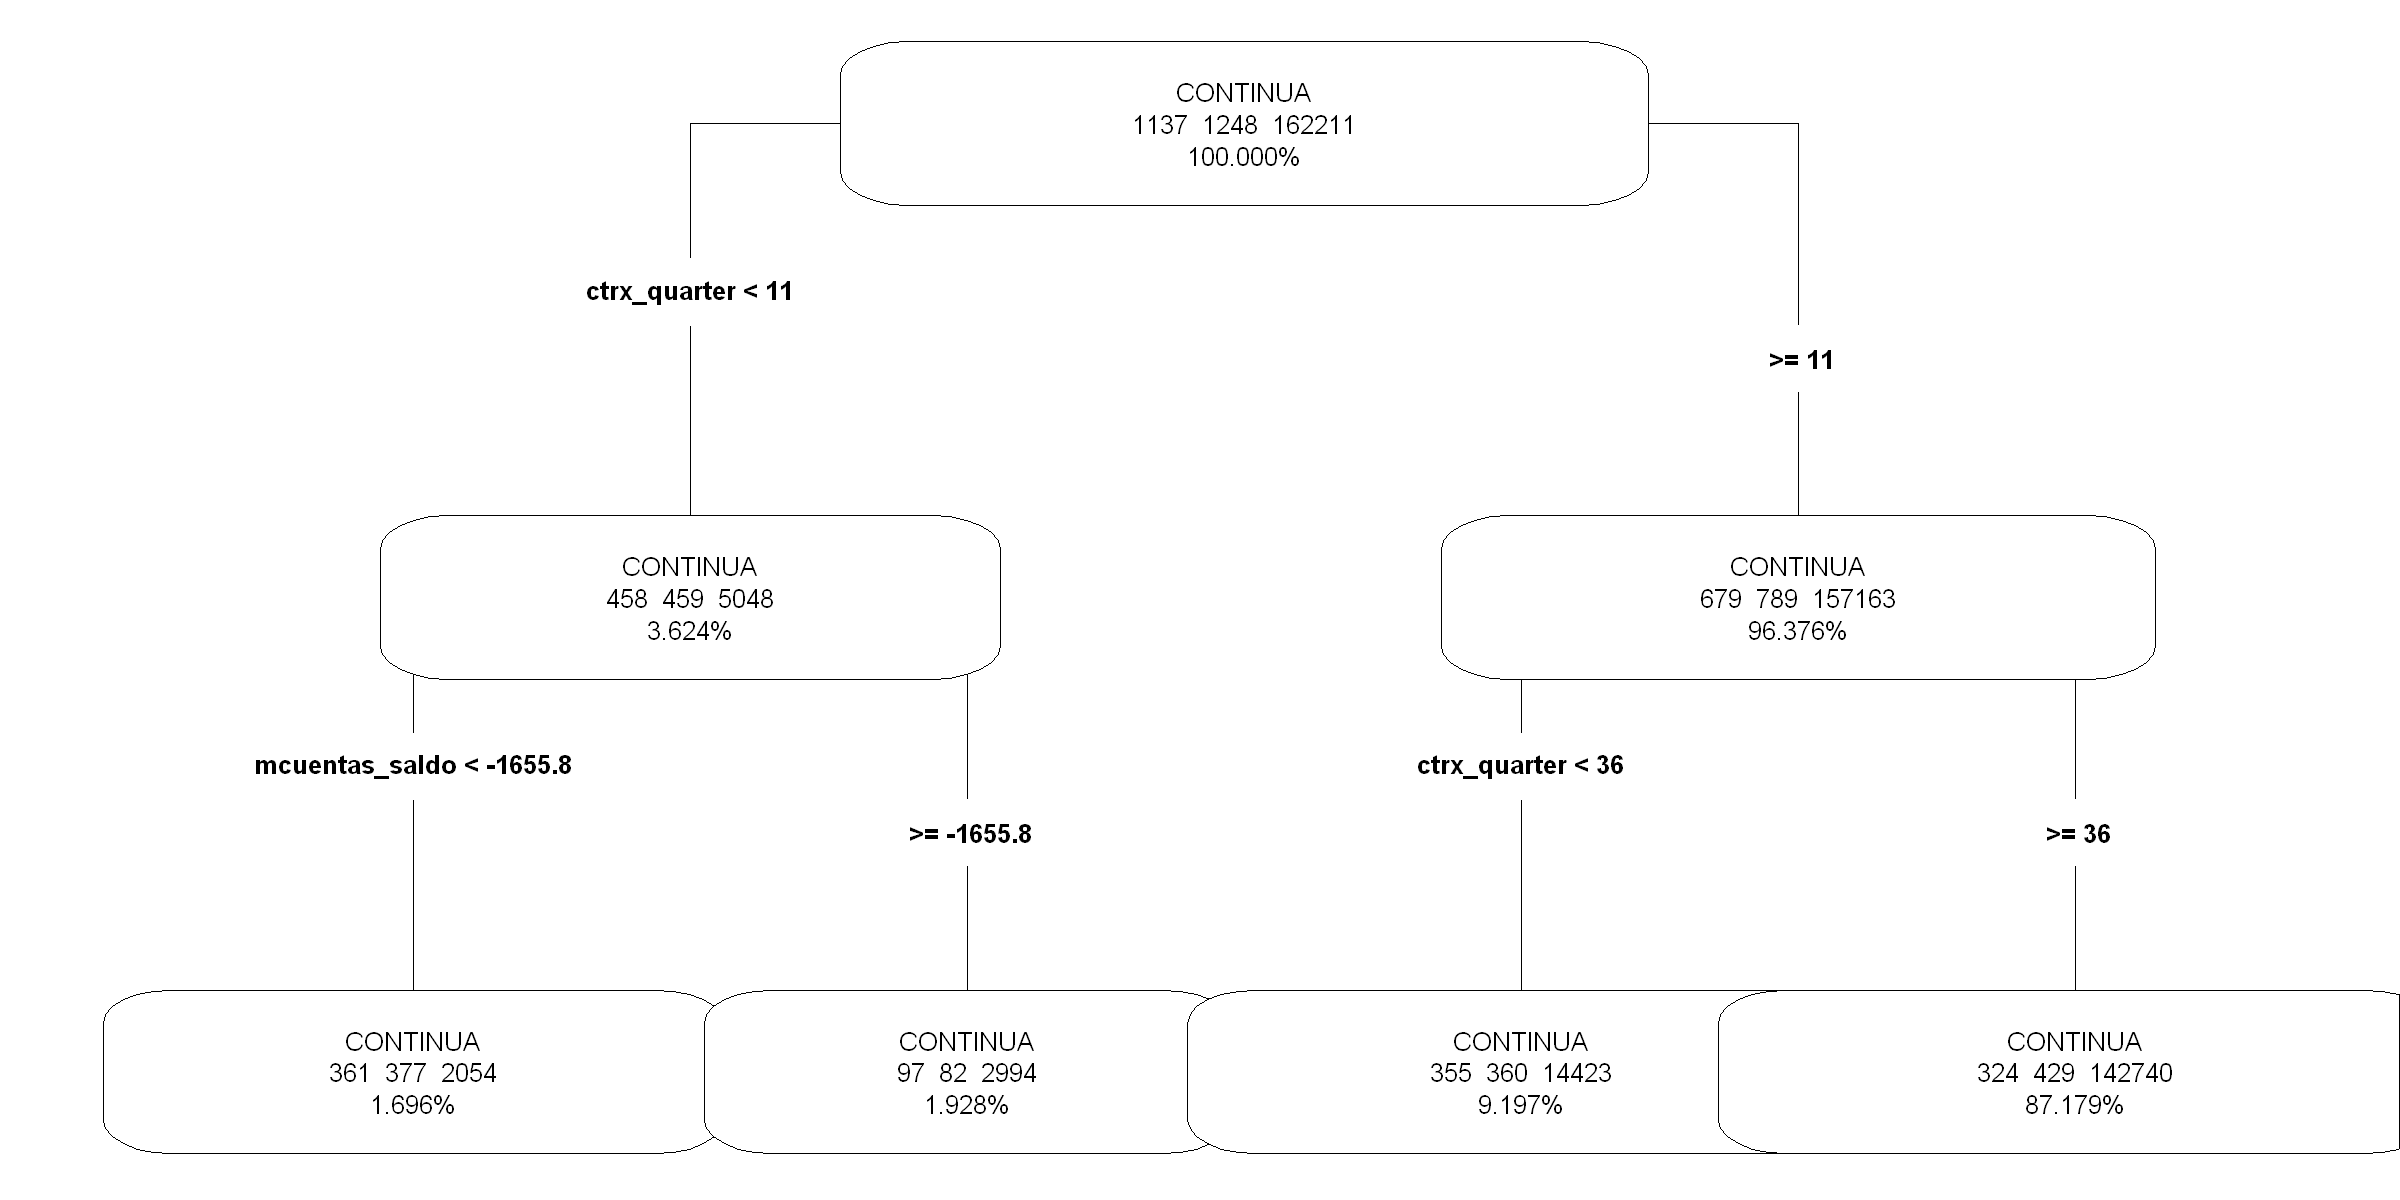

In [3]:
# genero el modelo
modelo <- rpart(
    formula = "clase_ternaria ~ .",
    data = dataset[foto_mes == 202107],
    xval = 0,
    cp = -1,
    maxdepth = 2
)

# imprimo el modelo graficamente
prp(modelo, extra = 101, digits = -5, branch = 1, type = 4, varlen = 0, faclen = 0, tweak = 1.1, cex = 1.2)
# arbol de profundidad 2, un cp negativo.

La variable mas importante que aparece es **ctrx_quarter**

### variables colineales

agrego al dataset tres variables colineales  con ctrx_quarter

In [4]:
dataset[foto_mes == 202107, ctrx_quarter_dos := 2 * ctrx_quarter]
dataset[foto_mes == 202107, ctrx_quarter_tres := 3 * ctrx_quarter]
dataset[foto_mes == 202107, ctrx_quarter_cuatro := 4 * ctrx_quarter]


y vuelvo a correr el arbol de decision

Warning message:
"cex and tweak both specified, applying both"

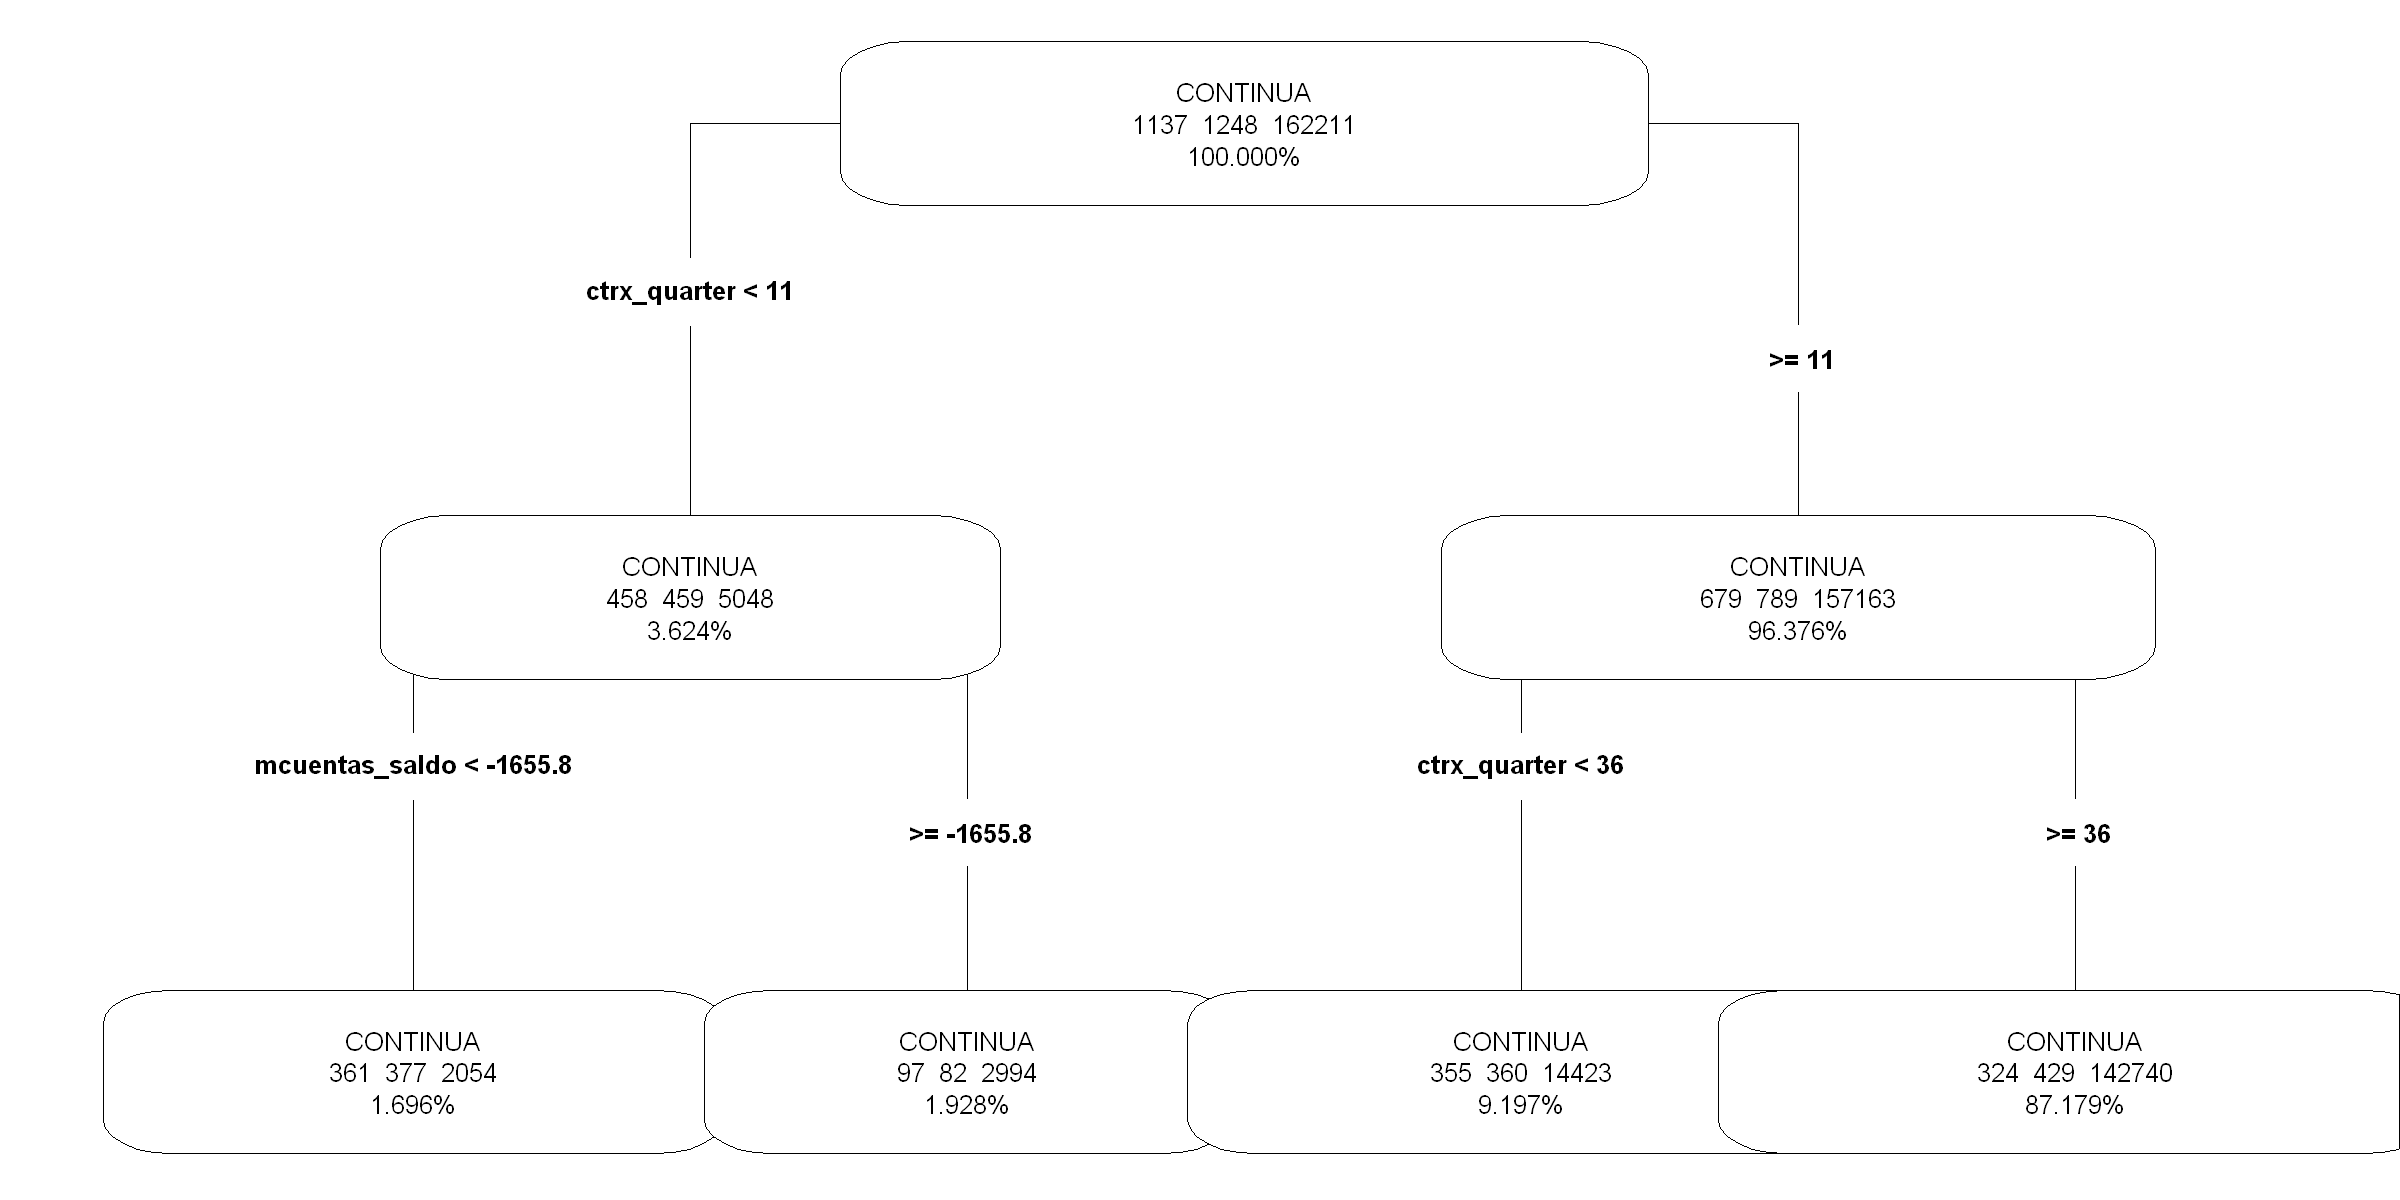

In [5]:
# genero el modelo
modelo <- rpart(
    formula = "clase_ternaria ~ .",
    data = dataset[foto_mes == 202107],
    xval = 0,
    cp = -1,
    maxdepth = 2
)

# imprimo el modelo graficamente
prp(modelo, extra = 101, digits = -5, branch = 1, type = 4, varlen = 0, faclen = 0, tweak = 1.1, cex = 1.2)


**SORPRENDENTE , el arbol de decision es inmune a las colinearidad de variables**
<br>
El arbol de decisión no ha cambiado. Su forma es exactamente igual, las cantidades en los nodos idéntica al arbol original.

###  Normalizacion de variables

Analizo la variable  ctrx_quarter

In [6]:
min(dataset[foto_mes == 202107, ctrx_quarter])


[1] 0

In [7]:
max(dataset[foto_mes == 202107, ctrx_quarter])


[1] 4089

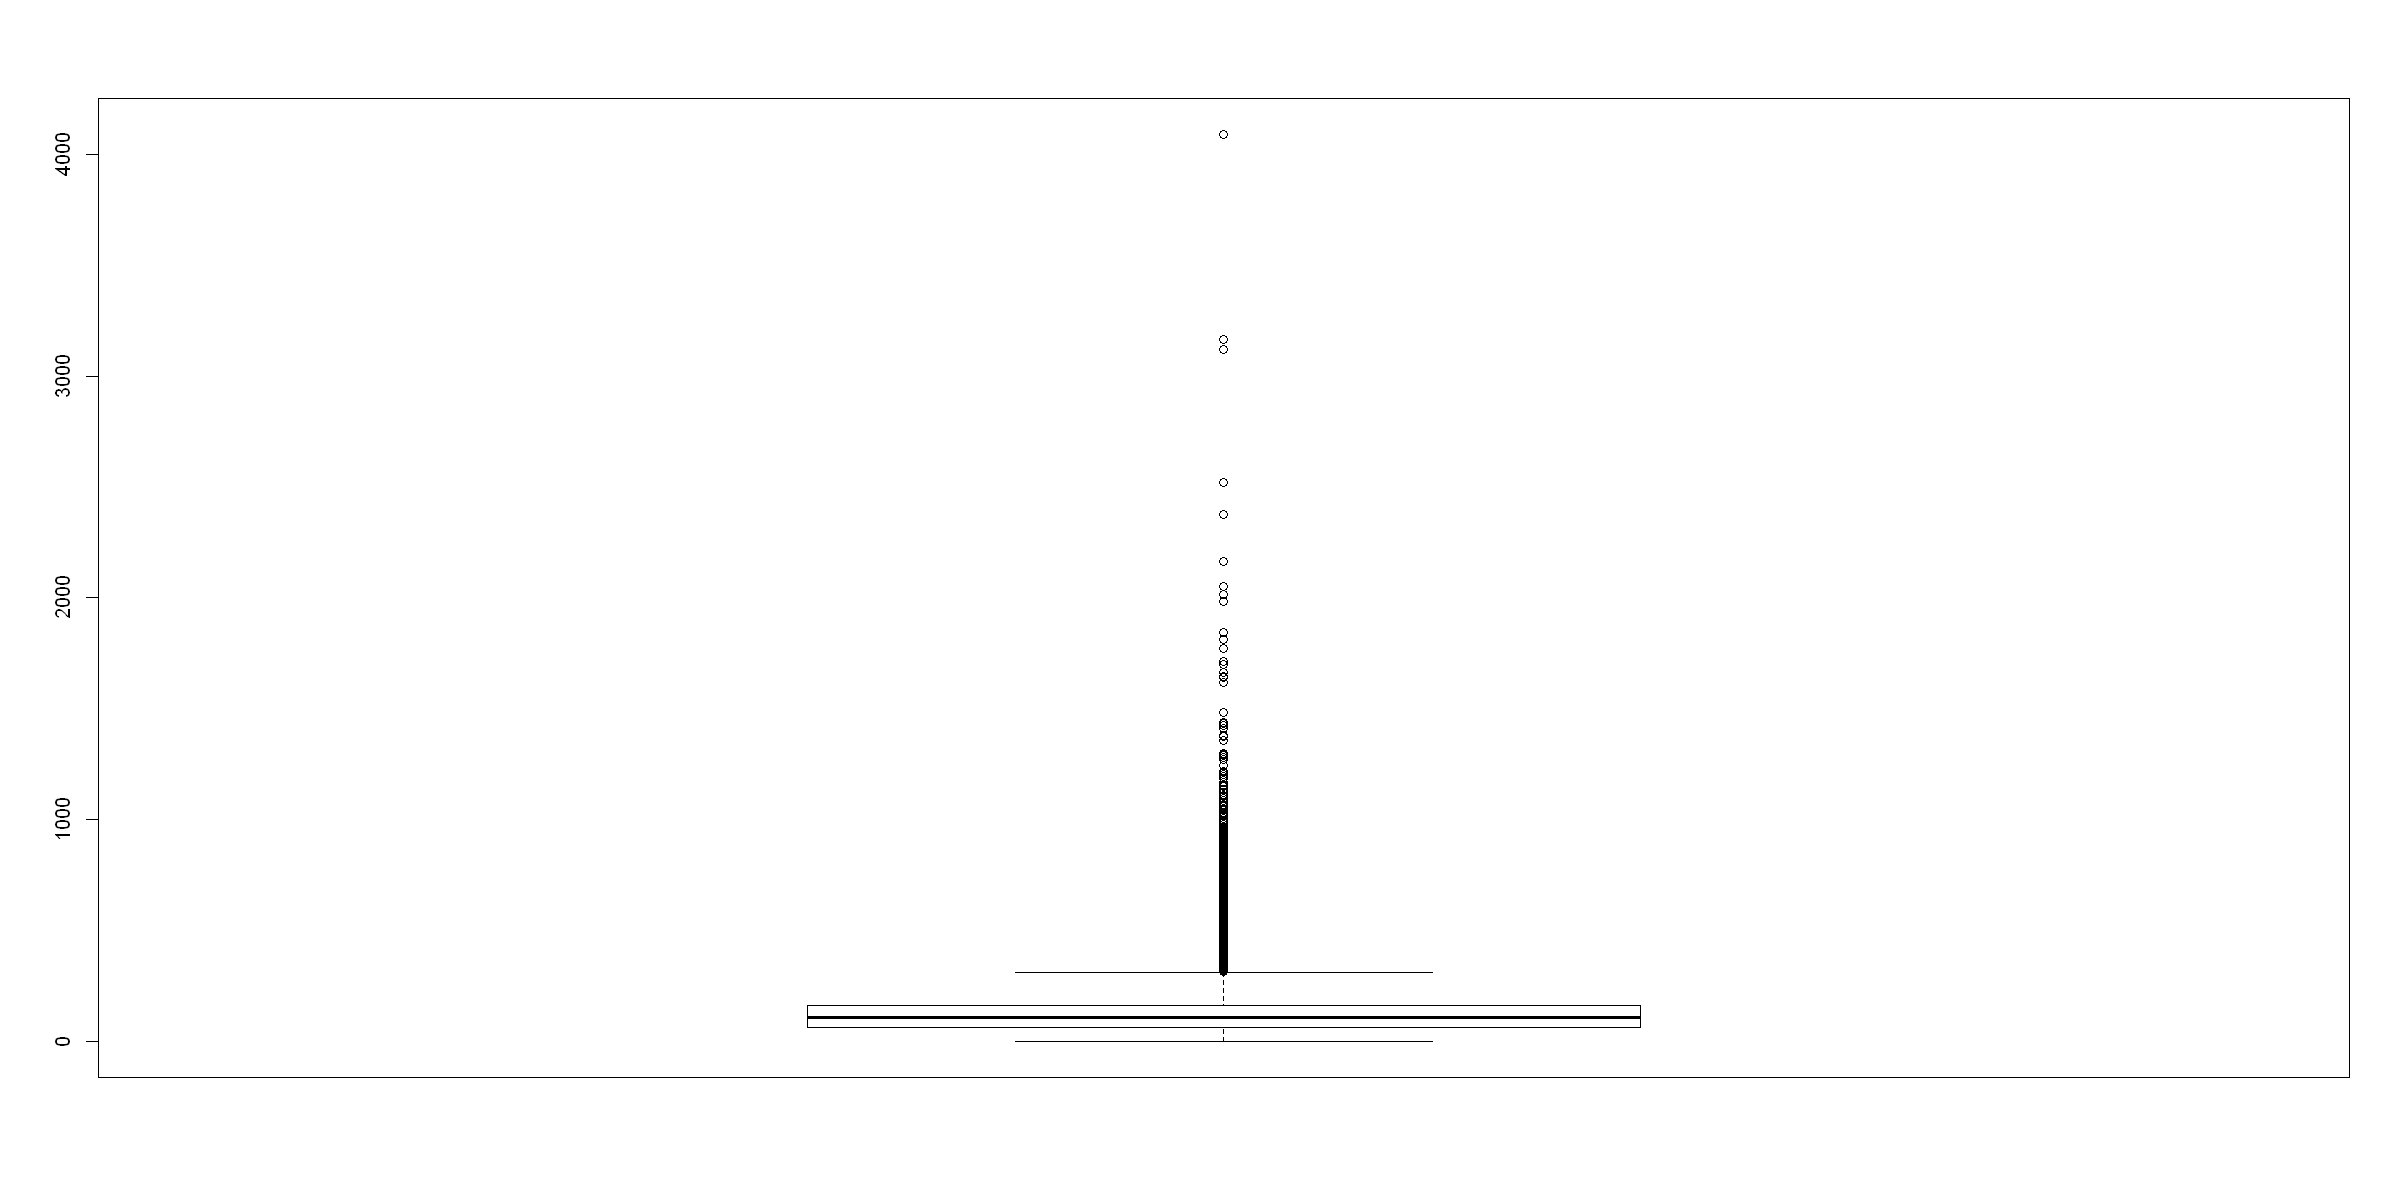

In [8]:
boxplot(dataset[foto_mes == 202107, ctrx_quarter])


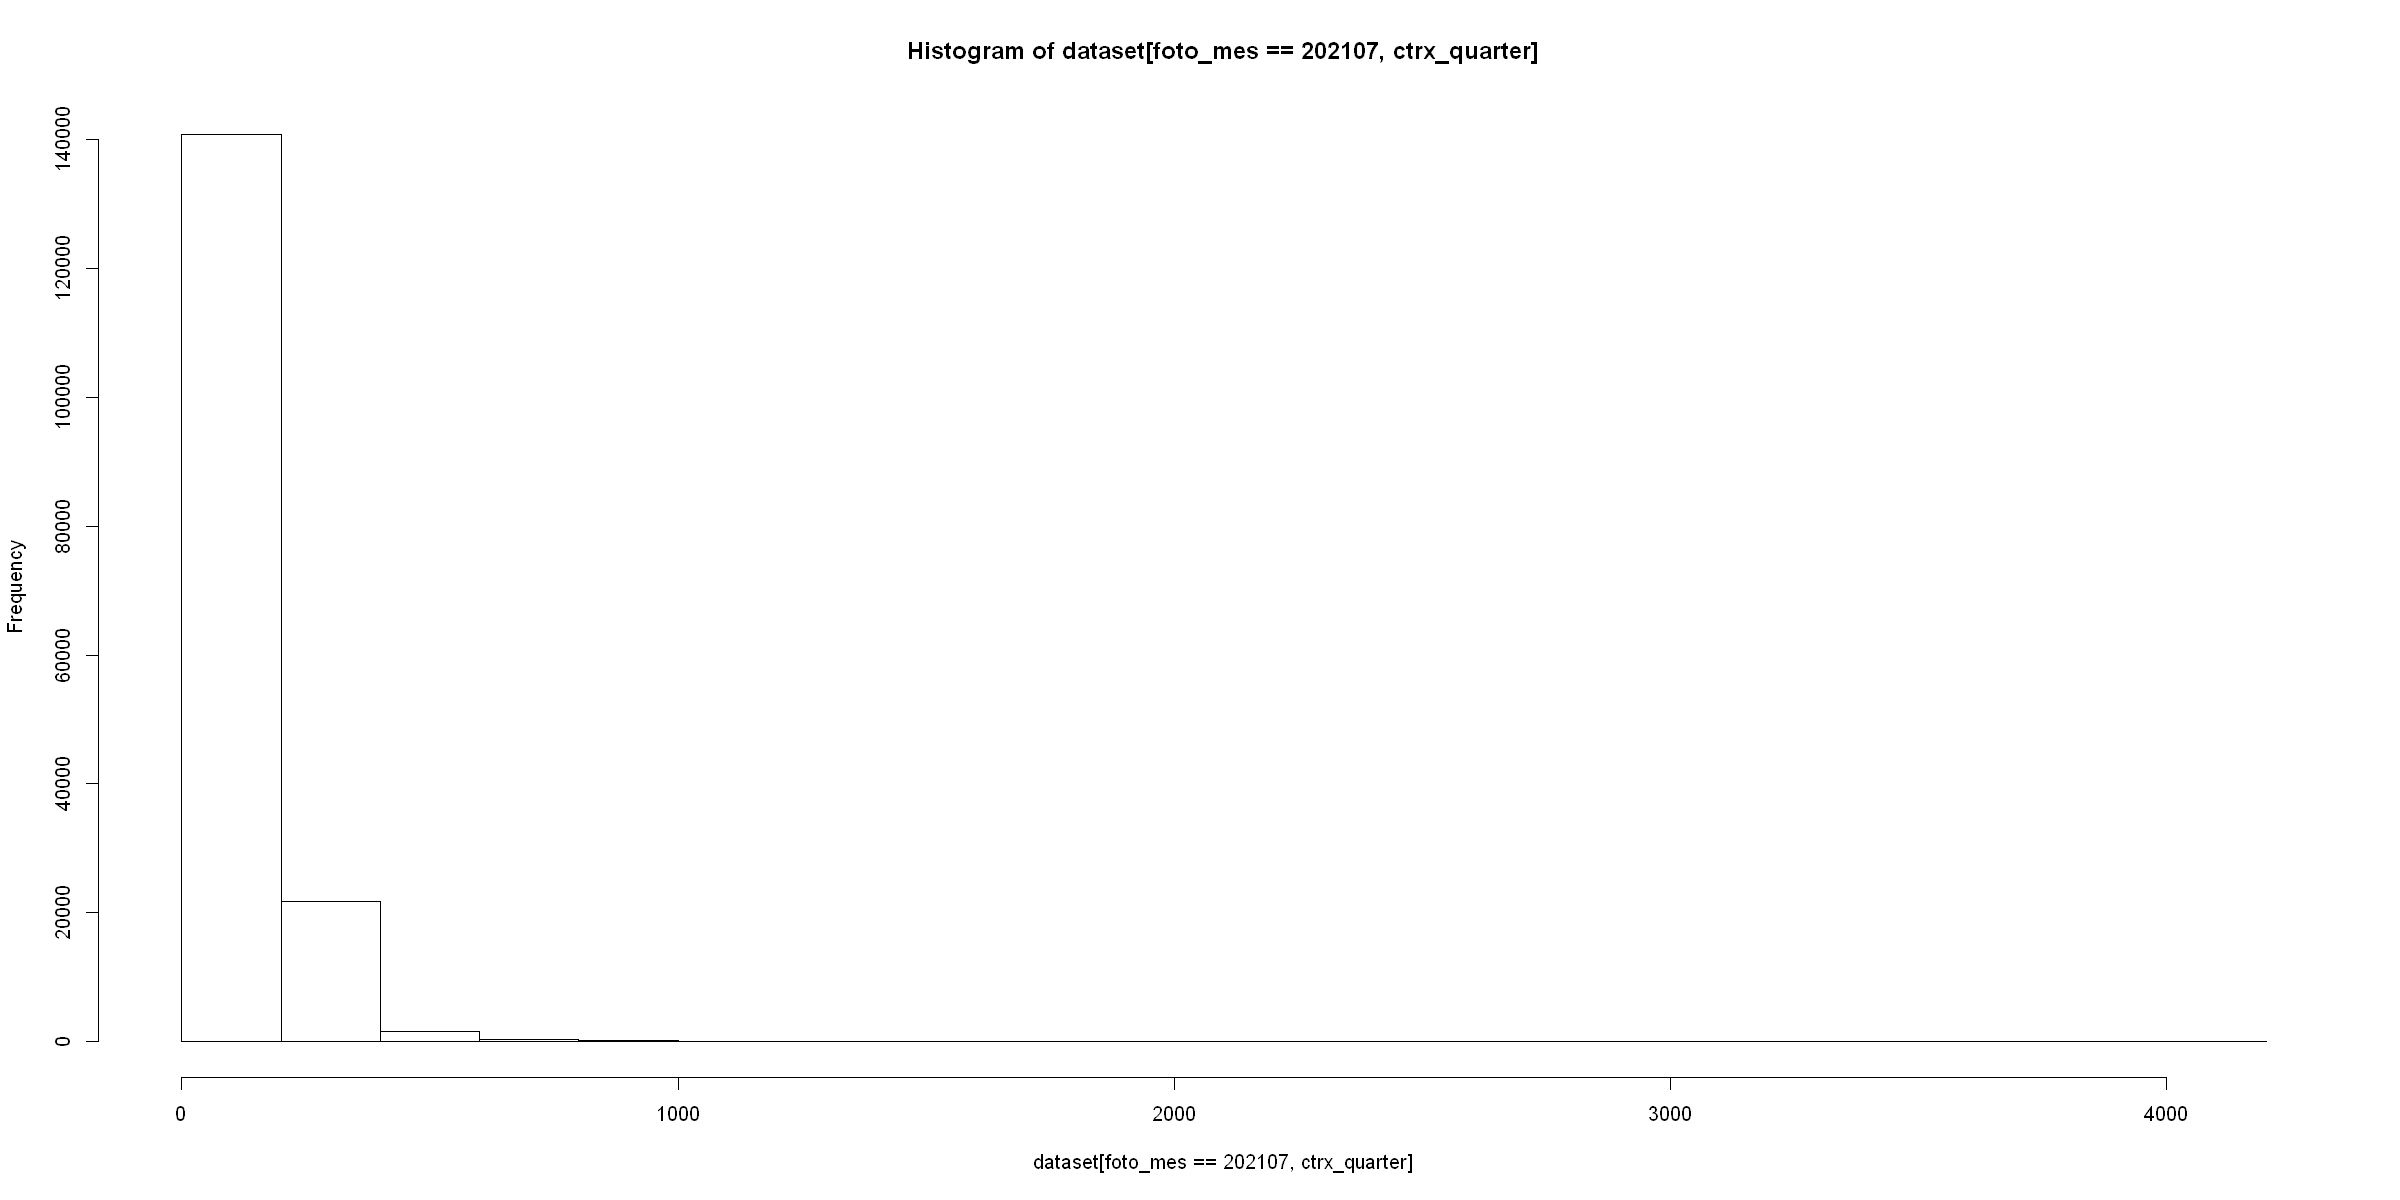

In [9]:
hist(dataset[foto_mes == 202107, ctrx_quarter])


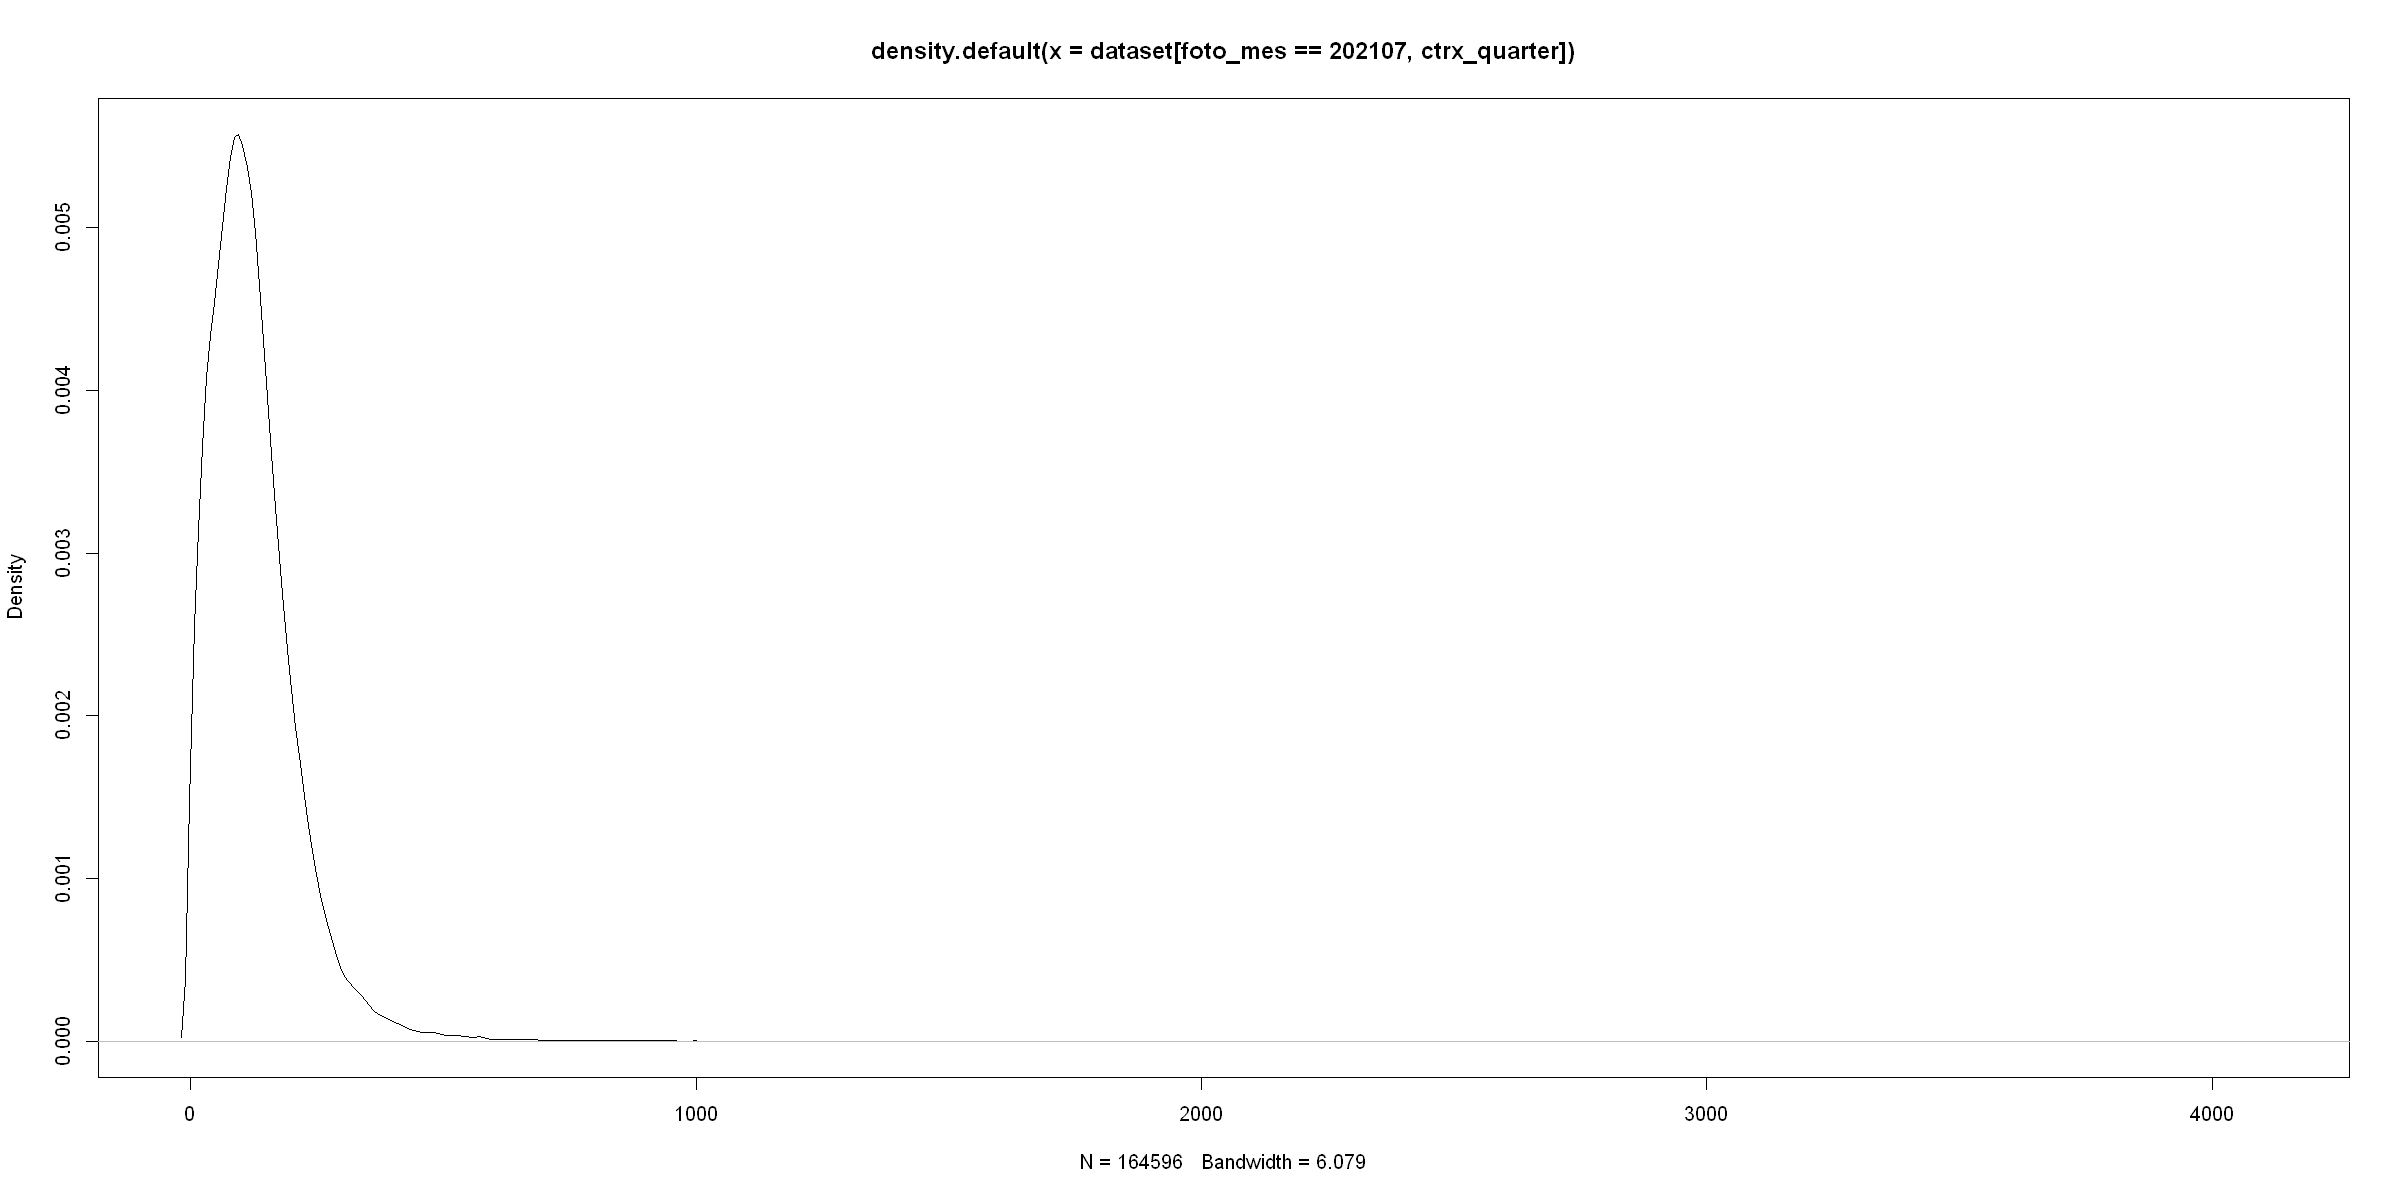

In [10]:
plot(density(dataset[foto_mes == 202107, ctrx_quarter]))


Normailzo  ctrx_quarter

In [11]:
dataset[foto_mes == 202107, ctrx_quarter_normalizado := scale(ctrx_quarter)]


confirmo que me quedó normalizada

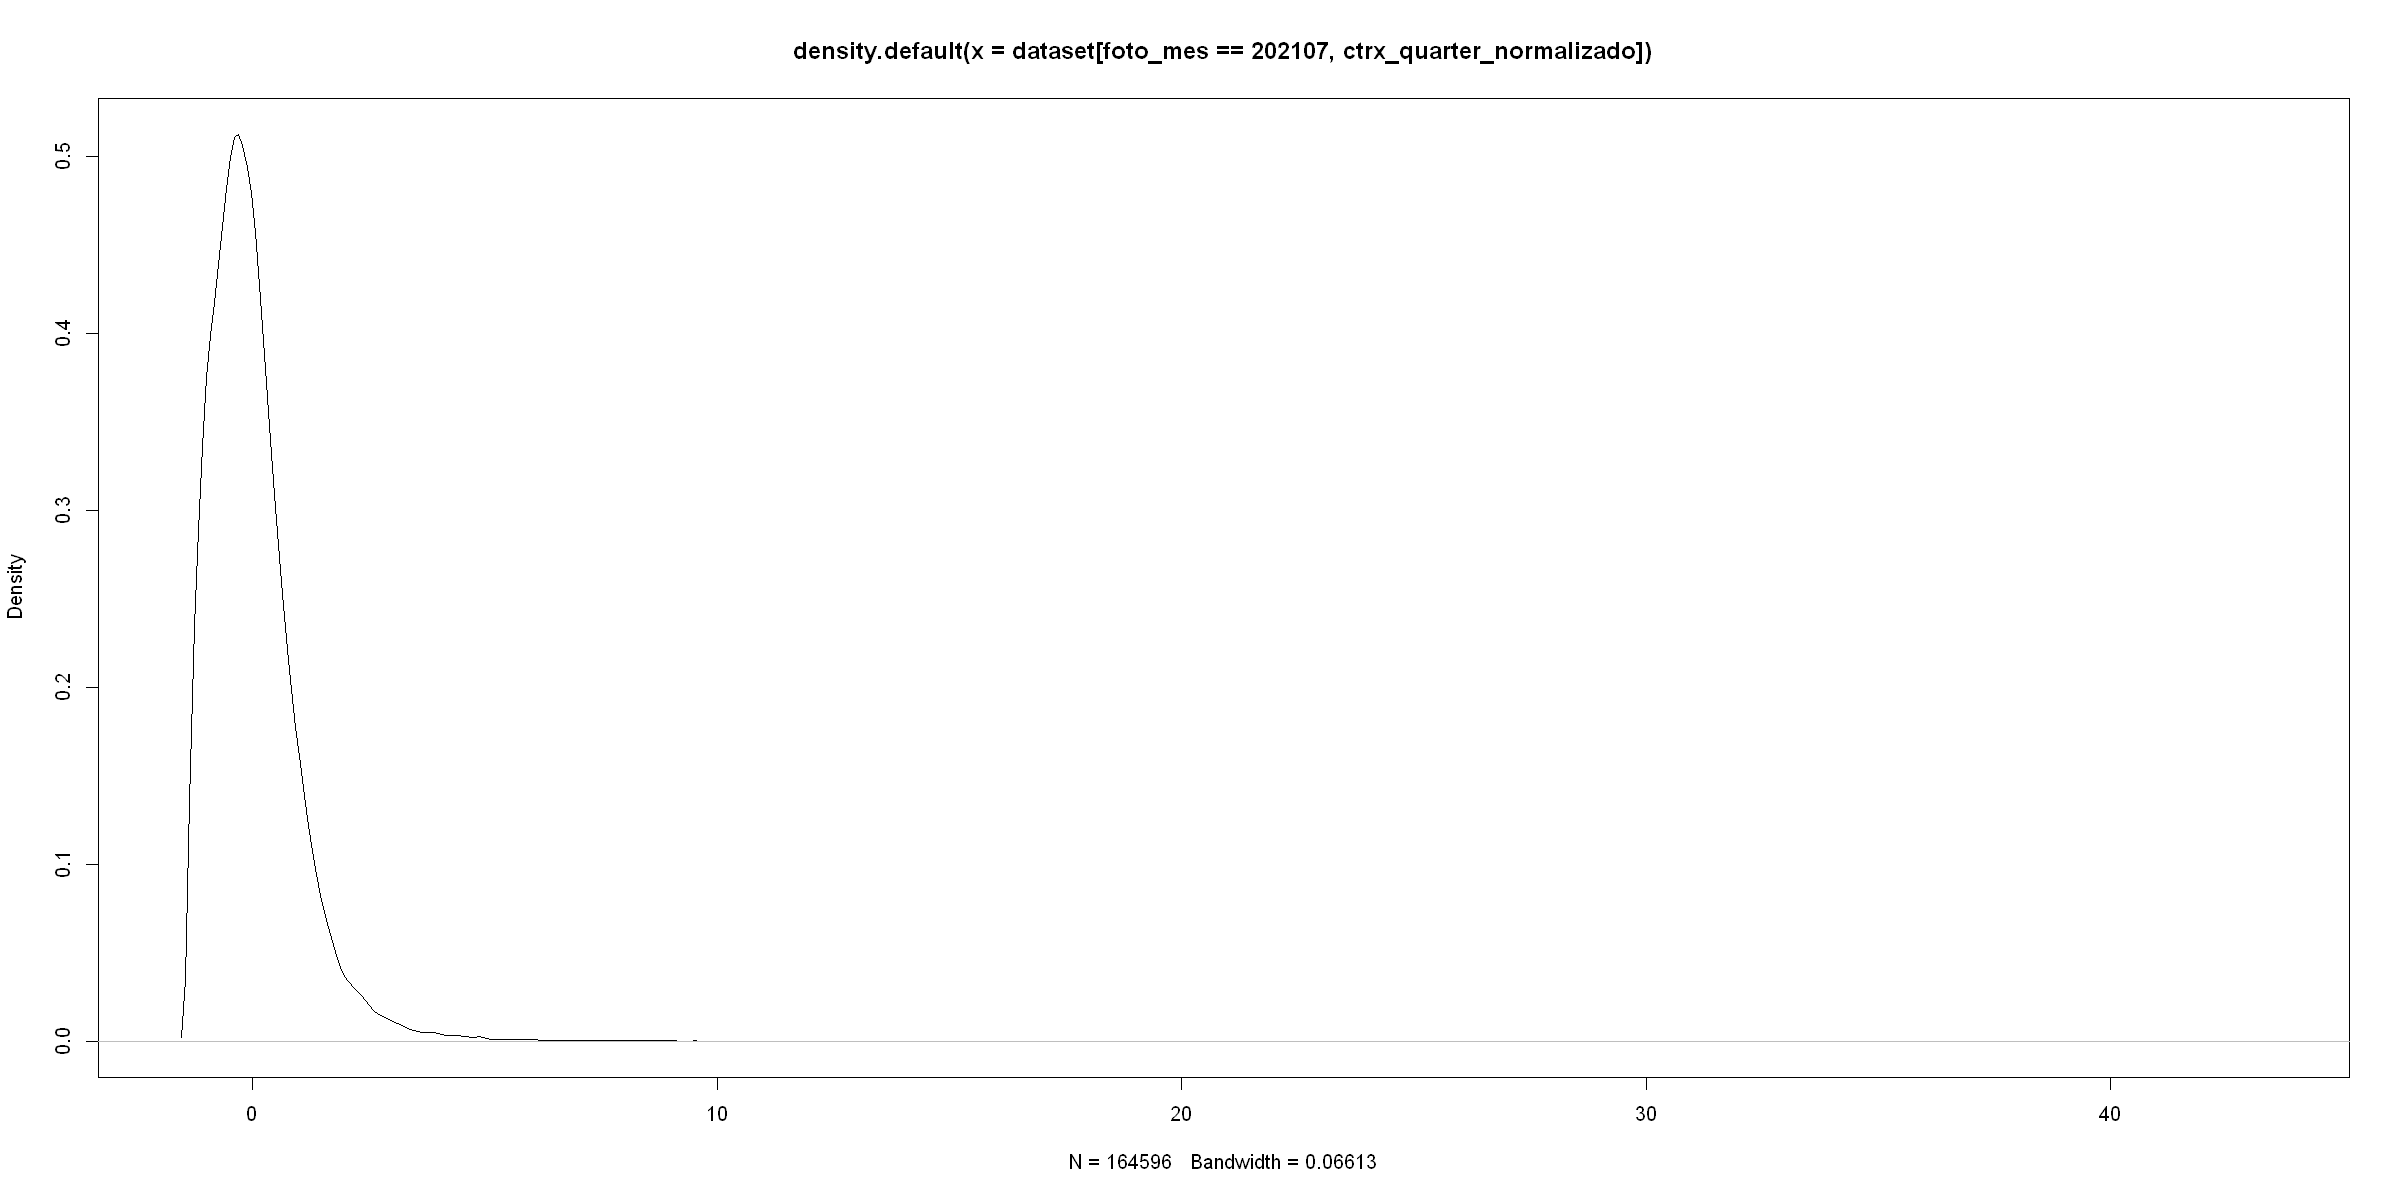

In [12]:
plot(density(dataset[foto_mes == 202107, ctrx_quarter_normalizado]))


Confirmado, la variable está normalizada, ahora corremos nuevamente el arbol de decision

Warning message:
"cex and tweak both specified, applying both"

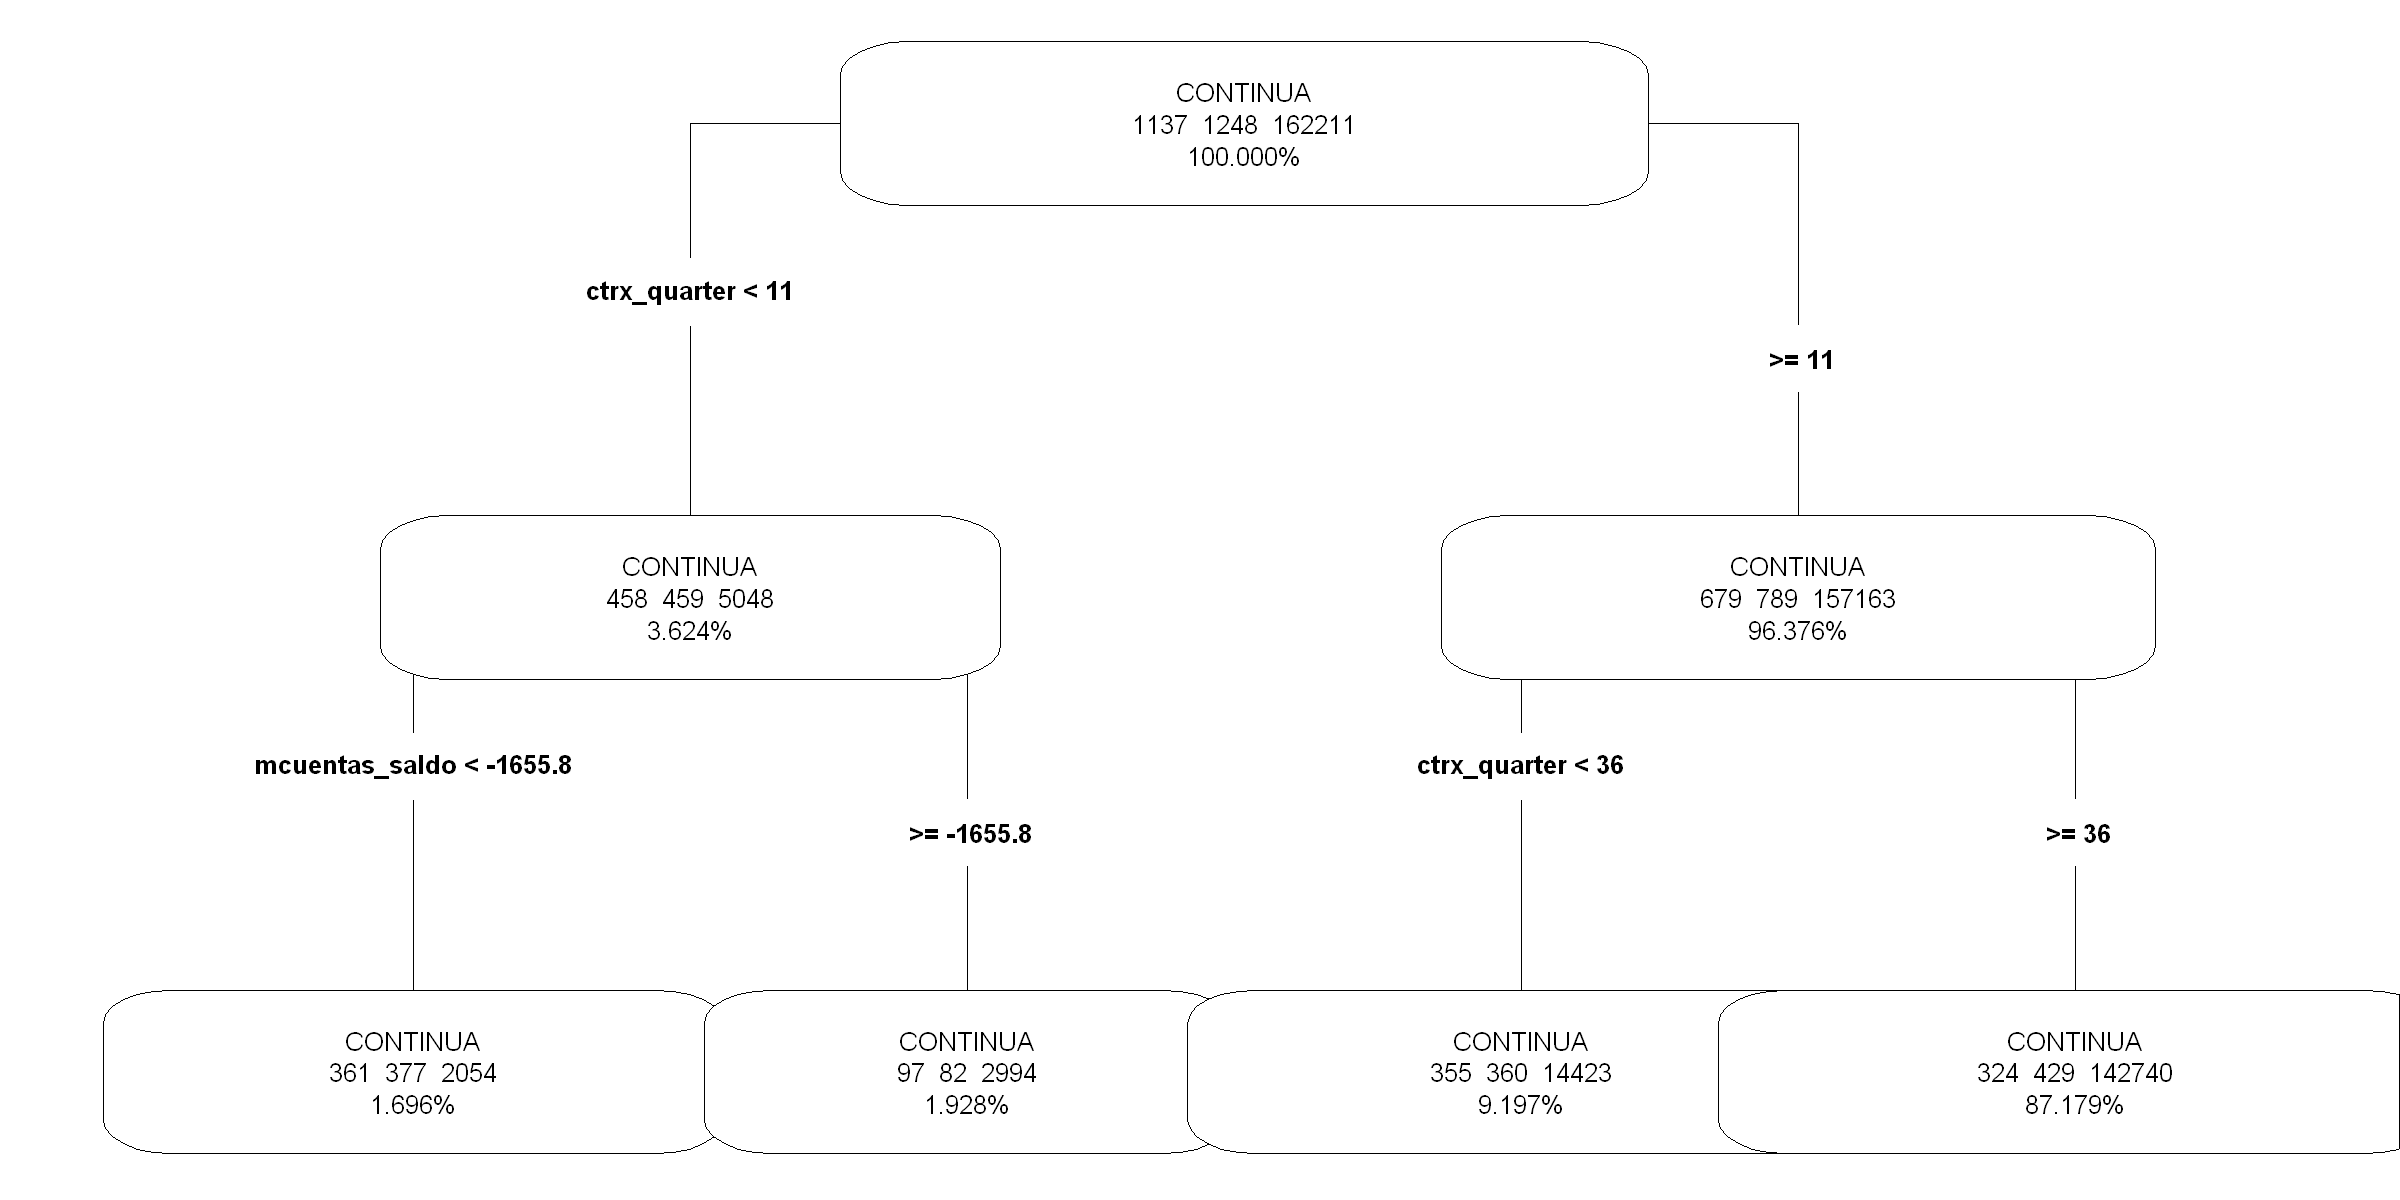

In [13]:
# genero el modelo
modelo <- rpart(
    formula = "clase_ternaria ~ .",
    data = dataset[foto_mes == 202107],
    xval = 0,
    cp = -1,
    maxdepth = 2
)

# imprimo el modelo graficamente
prp(modelo, extra = 101, digits = -5, branch = 1, type = 4, varlen = 0, faclen = 0, tweak = 1.1, cex = 1.2)


**SORPRENDENTE , el arbol de decision es inmune a las normalizacion de variables**
<br>
El arbol de decisión no ha cambiado. Su forma es exactamente igual, las cantidades en los nodos idéntica al arbol original.
<br>

### Transformación  logaritmica

Primero vuelvo a cargar el dataset

In [16]:
dataset <- fread("D:\\MAESTRIA AUSTRAL DATA SCIENCE\\MATERIAS\\2doSem\\Laboratorio 1\\datasets\\dataset_pequeno.csv") # Establezco el Working Directory


hago la transformación logarítmica

In [19]:
dataset[foto_mes == 202107, ctrx_quarter_log := log(ctrx_quarter + 1)] # sumo el uno porque no quiero infinitos


Ahora veo el boxplot

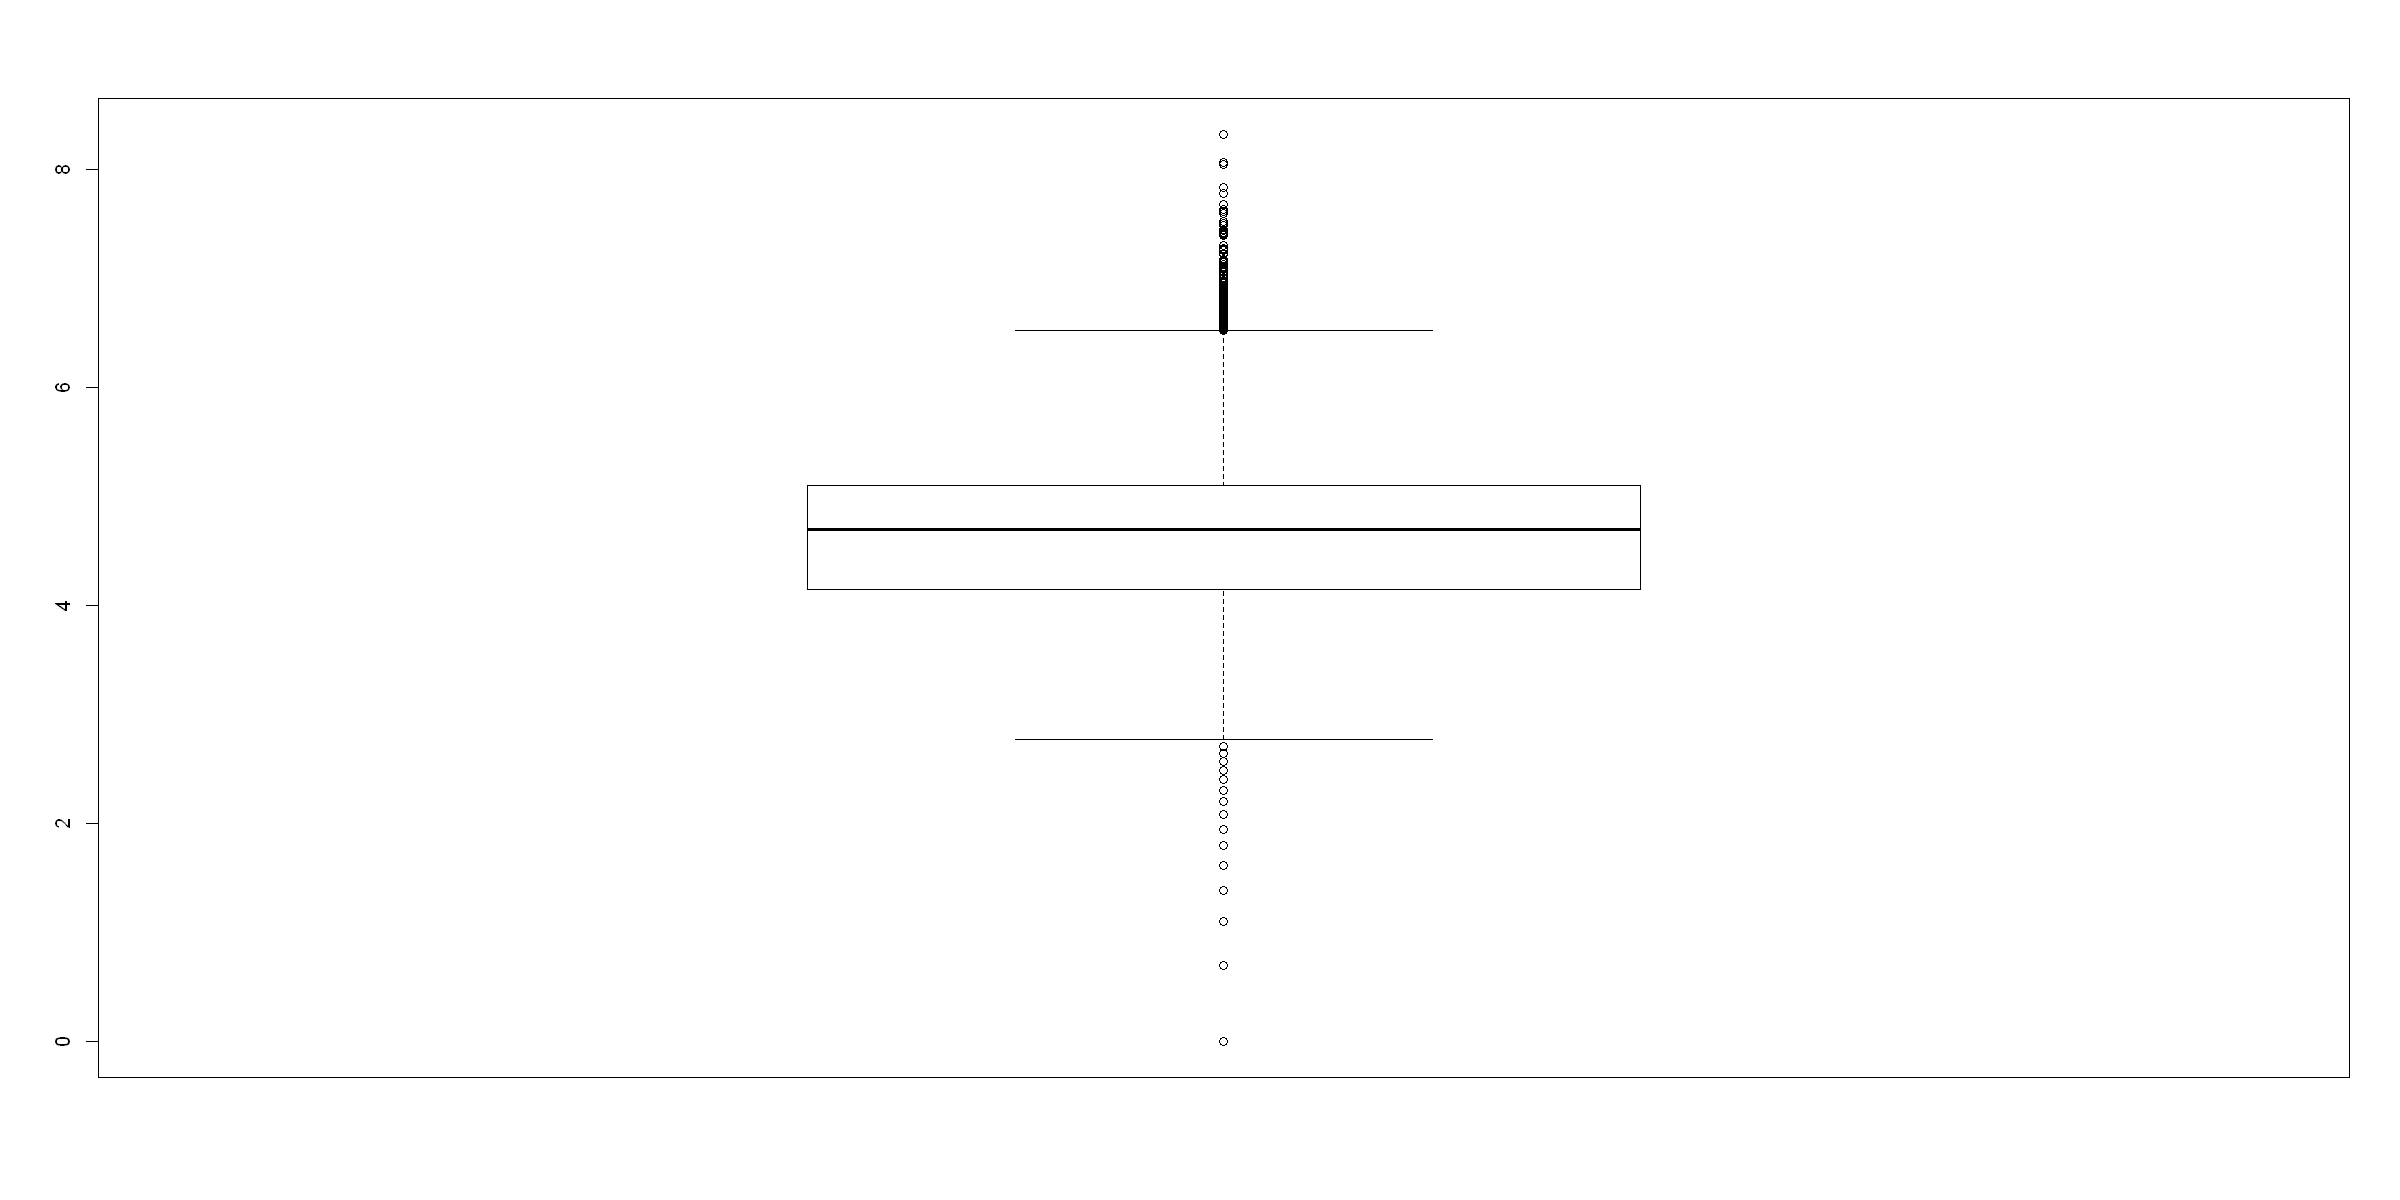

In [18]:
boxplot(dataset[foto_mes == 202107, ctrx_quarter_log])


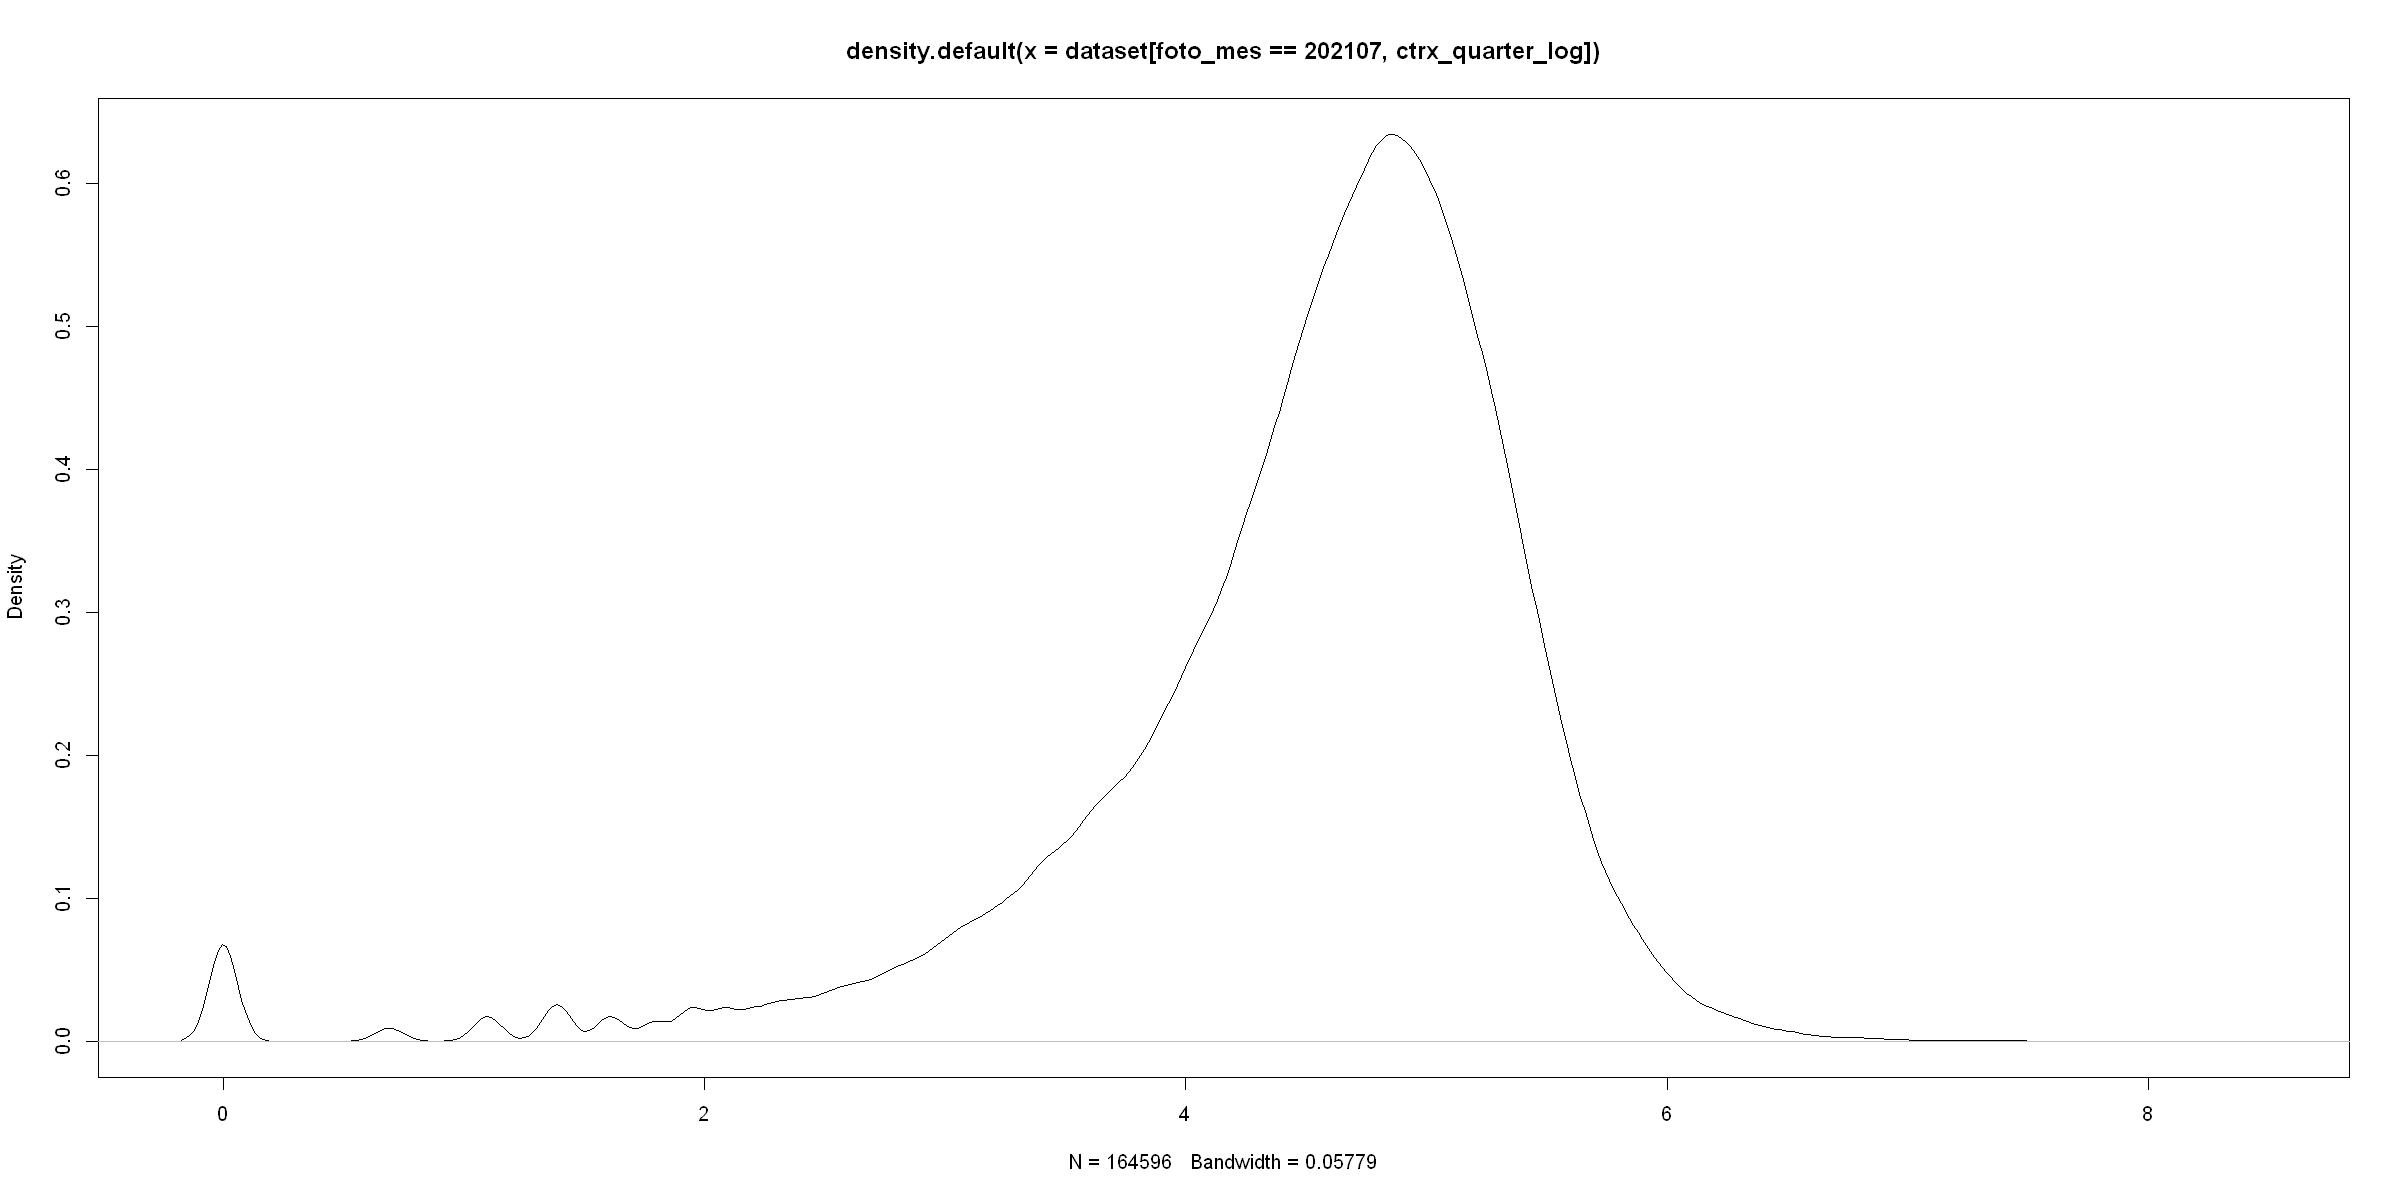

In [20]:
plot(density(dataset[foto_mes == 202107, ctrx_quarter_log]))


Finalmente, el arbol de decision

Pero antes, ELIMINO del dataset la variable  ctrx_quarter , para que solo juegue  ctrx_quarter_log

In [21]:
dataset[, ctrx_quarter := NULL]


Warning message:
"cex and tweak both specified, applying both"

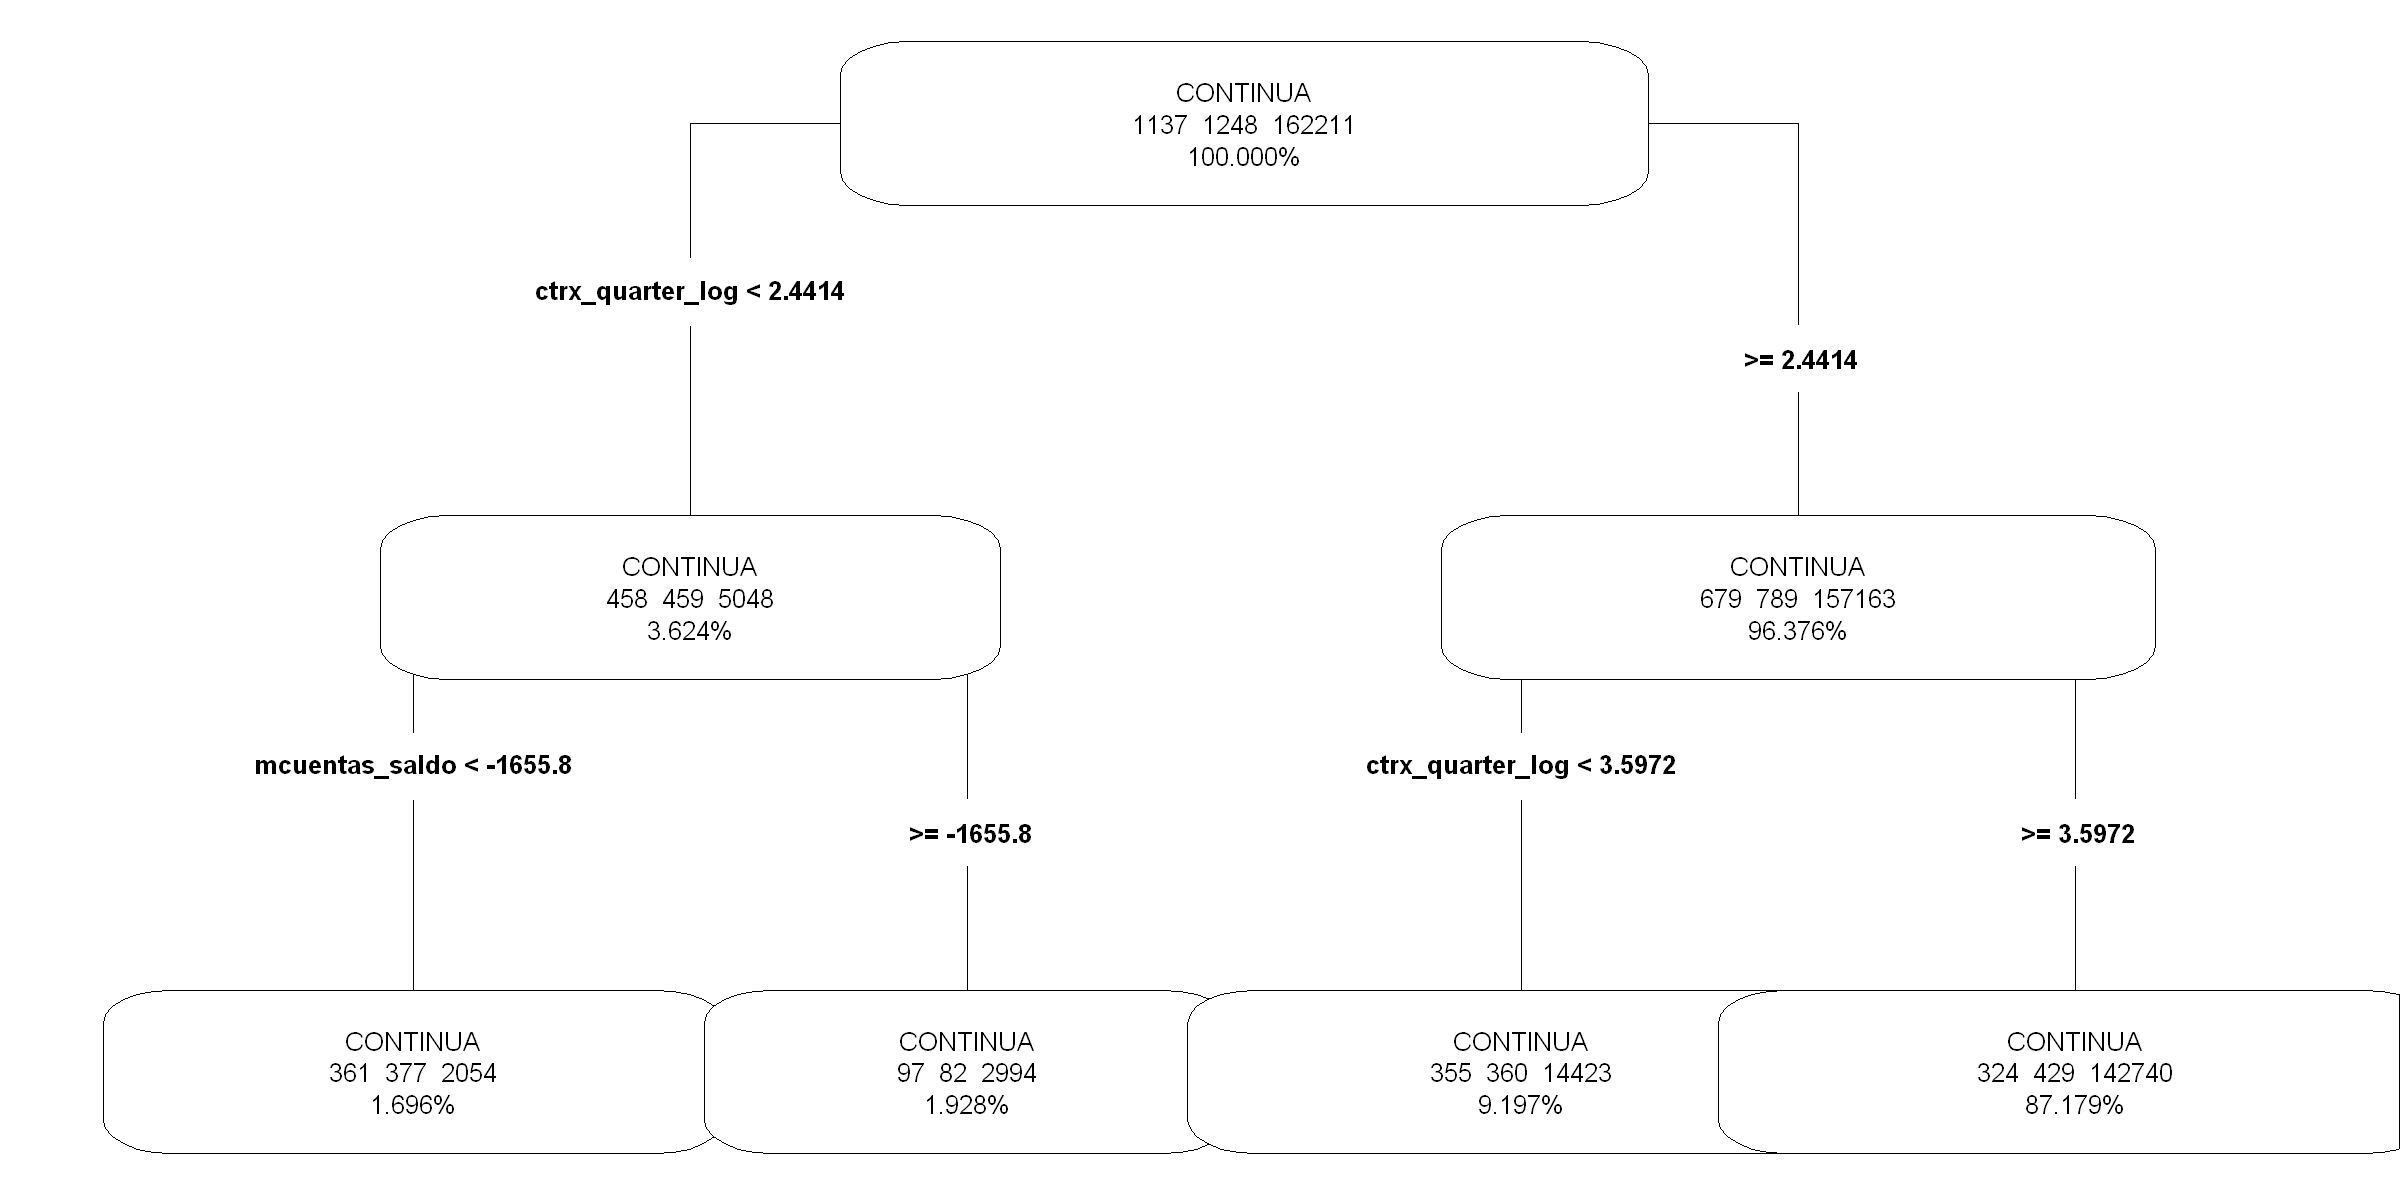

In [22]:
# genero el modelo
modelo <- rpart(
    formula = "clase_ternaria ~ .",
    data = dataset[foto_mes == 202107],
    xval = 0,
    cp = -1,
    maxdepth = 2
)

# imprimo el modelo graficamente
prp(modelo, extra = 101, digits = -5, branch = 1, type = 4, varlen = 0, faclen = 0, tweak = 1.1, cex = 1.2)


**SORPRENDENTE , el arbol de decision es inmune a la transformada logaritmica**
<br>
El arbol de decisión no ha cambiado. Su forma es exactamente igual, las cantidades en los nodos idéntica al arbol original.
<br>
Por supuesto, el arbol original cortaba en  ctrx_quarter < 10 y ahora corta en ctrx_quarter < 2.35 porque obviamente alteré esa variable, pero en realidad está cortando en el mismo punto.

### Outliers

Ahora fabrico outliers y veo como se comporta el arbol

Primero vuelvo a cargar el dataset

In [24]:
dataset <- fread("D:\\MAESTRIA AUSTRAL DATA SCIENCE\\MATERIAS\\2doSem\\Laboratorio 1\\datasets\\dataset_pequeno.csv")

el boxplot original

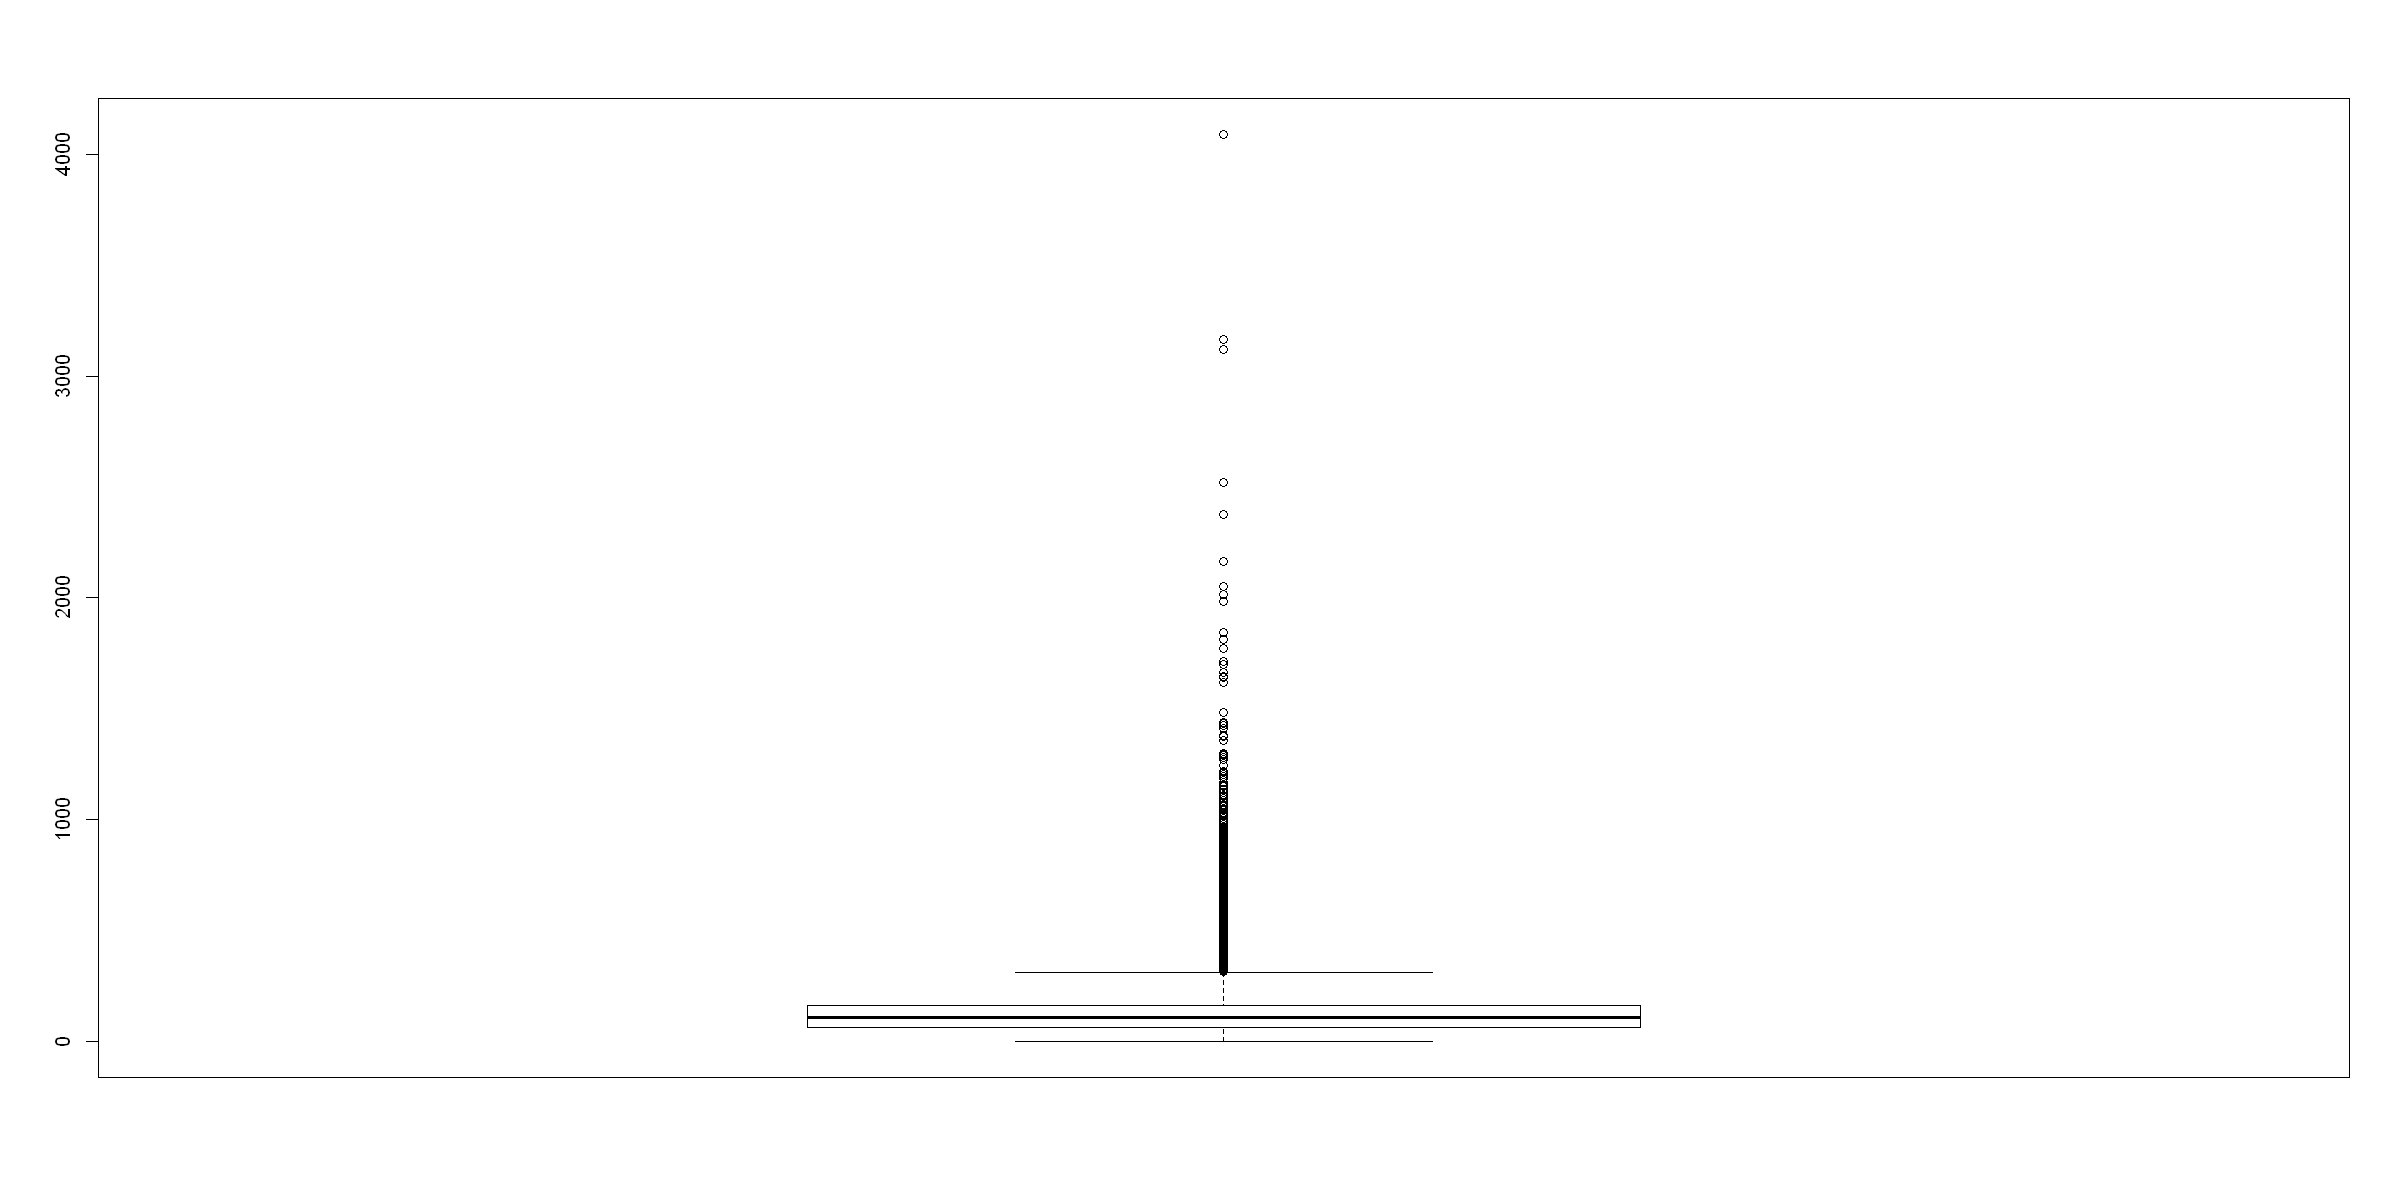

In [25]:
boxplot(dataset[foto_mes == 202107, ctrx_quarter])


cuento cuantos registros hay con ctrx_quarter > 1500

In [26]:
dataset[foto_mes == 202107 & ctrx_quarter > 1500, .N]


[1] 18

## Ahora, a esos 18 valores los transformo en outliers extremos

In [32]:
dataset[foto_mes == 202107 & ctrx_quarter > 1500, ctrx_quarter := ctrx_quarter * 1500]


compruebo que sean outliers extremos

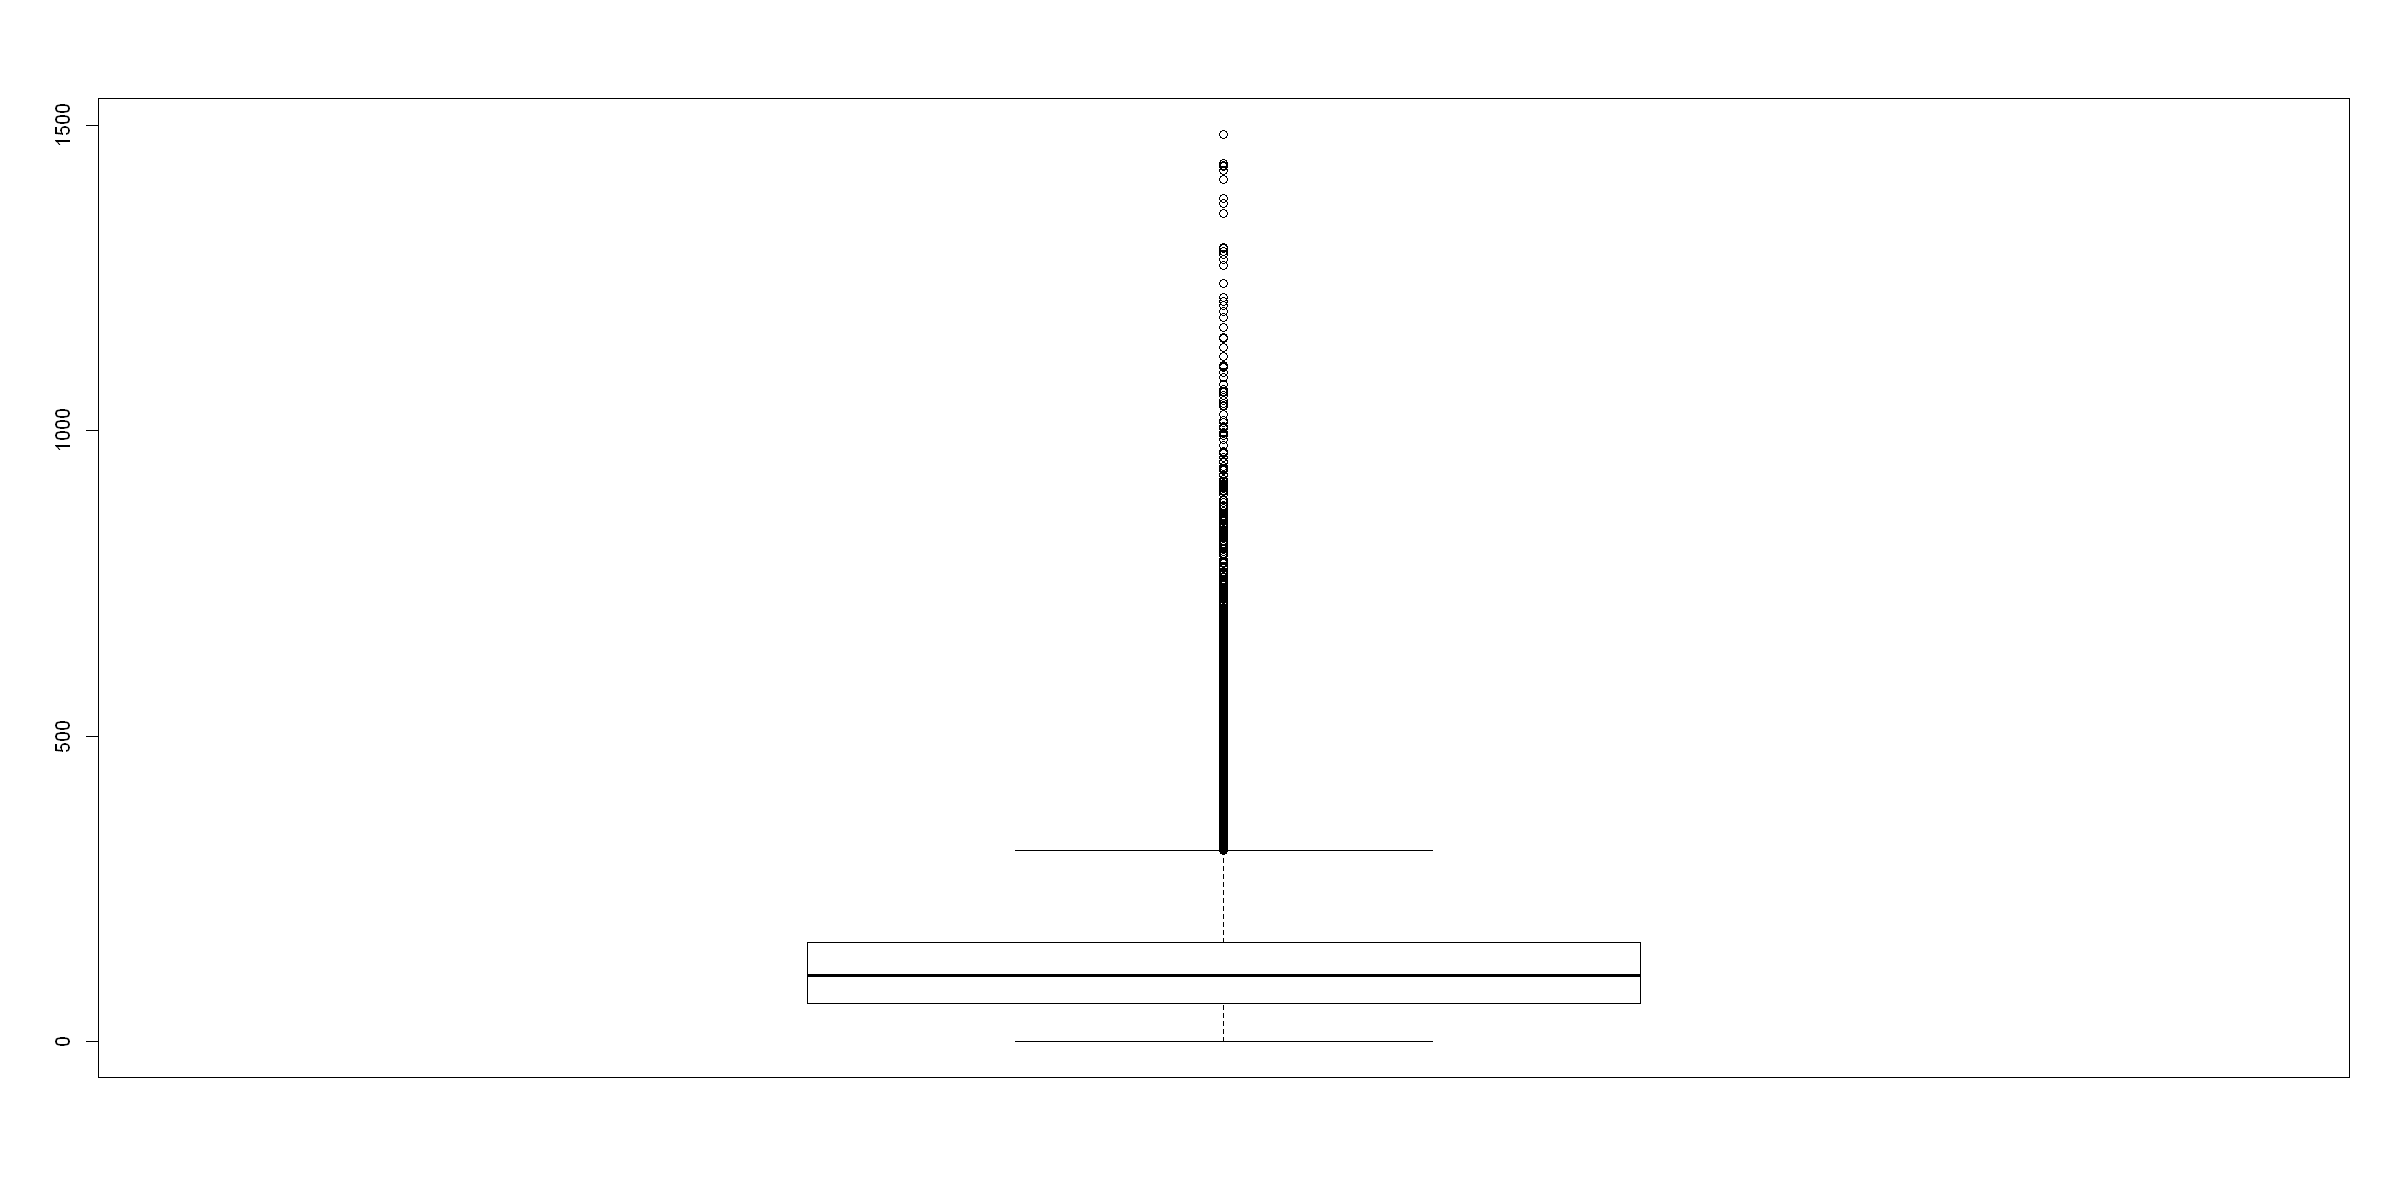

In [33]:
boxplot(dataset[foto_mes == 202107, ctrx_quarter])


Finalmente, nuevamente arbol de decision

Warning message:
"cex and tweak both specified, applying both"

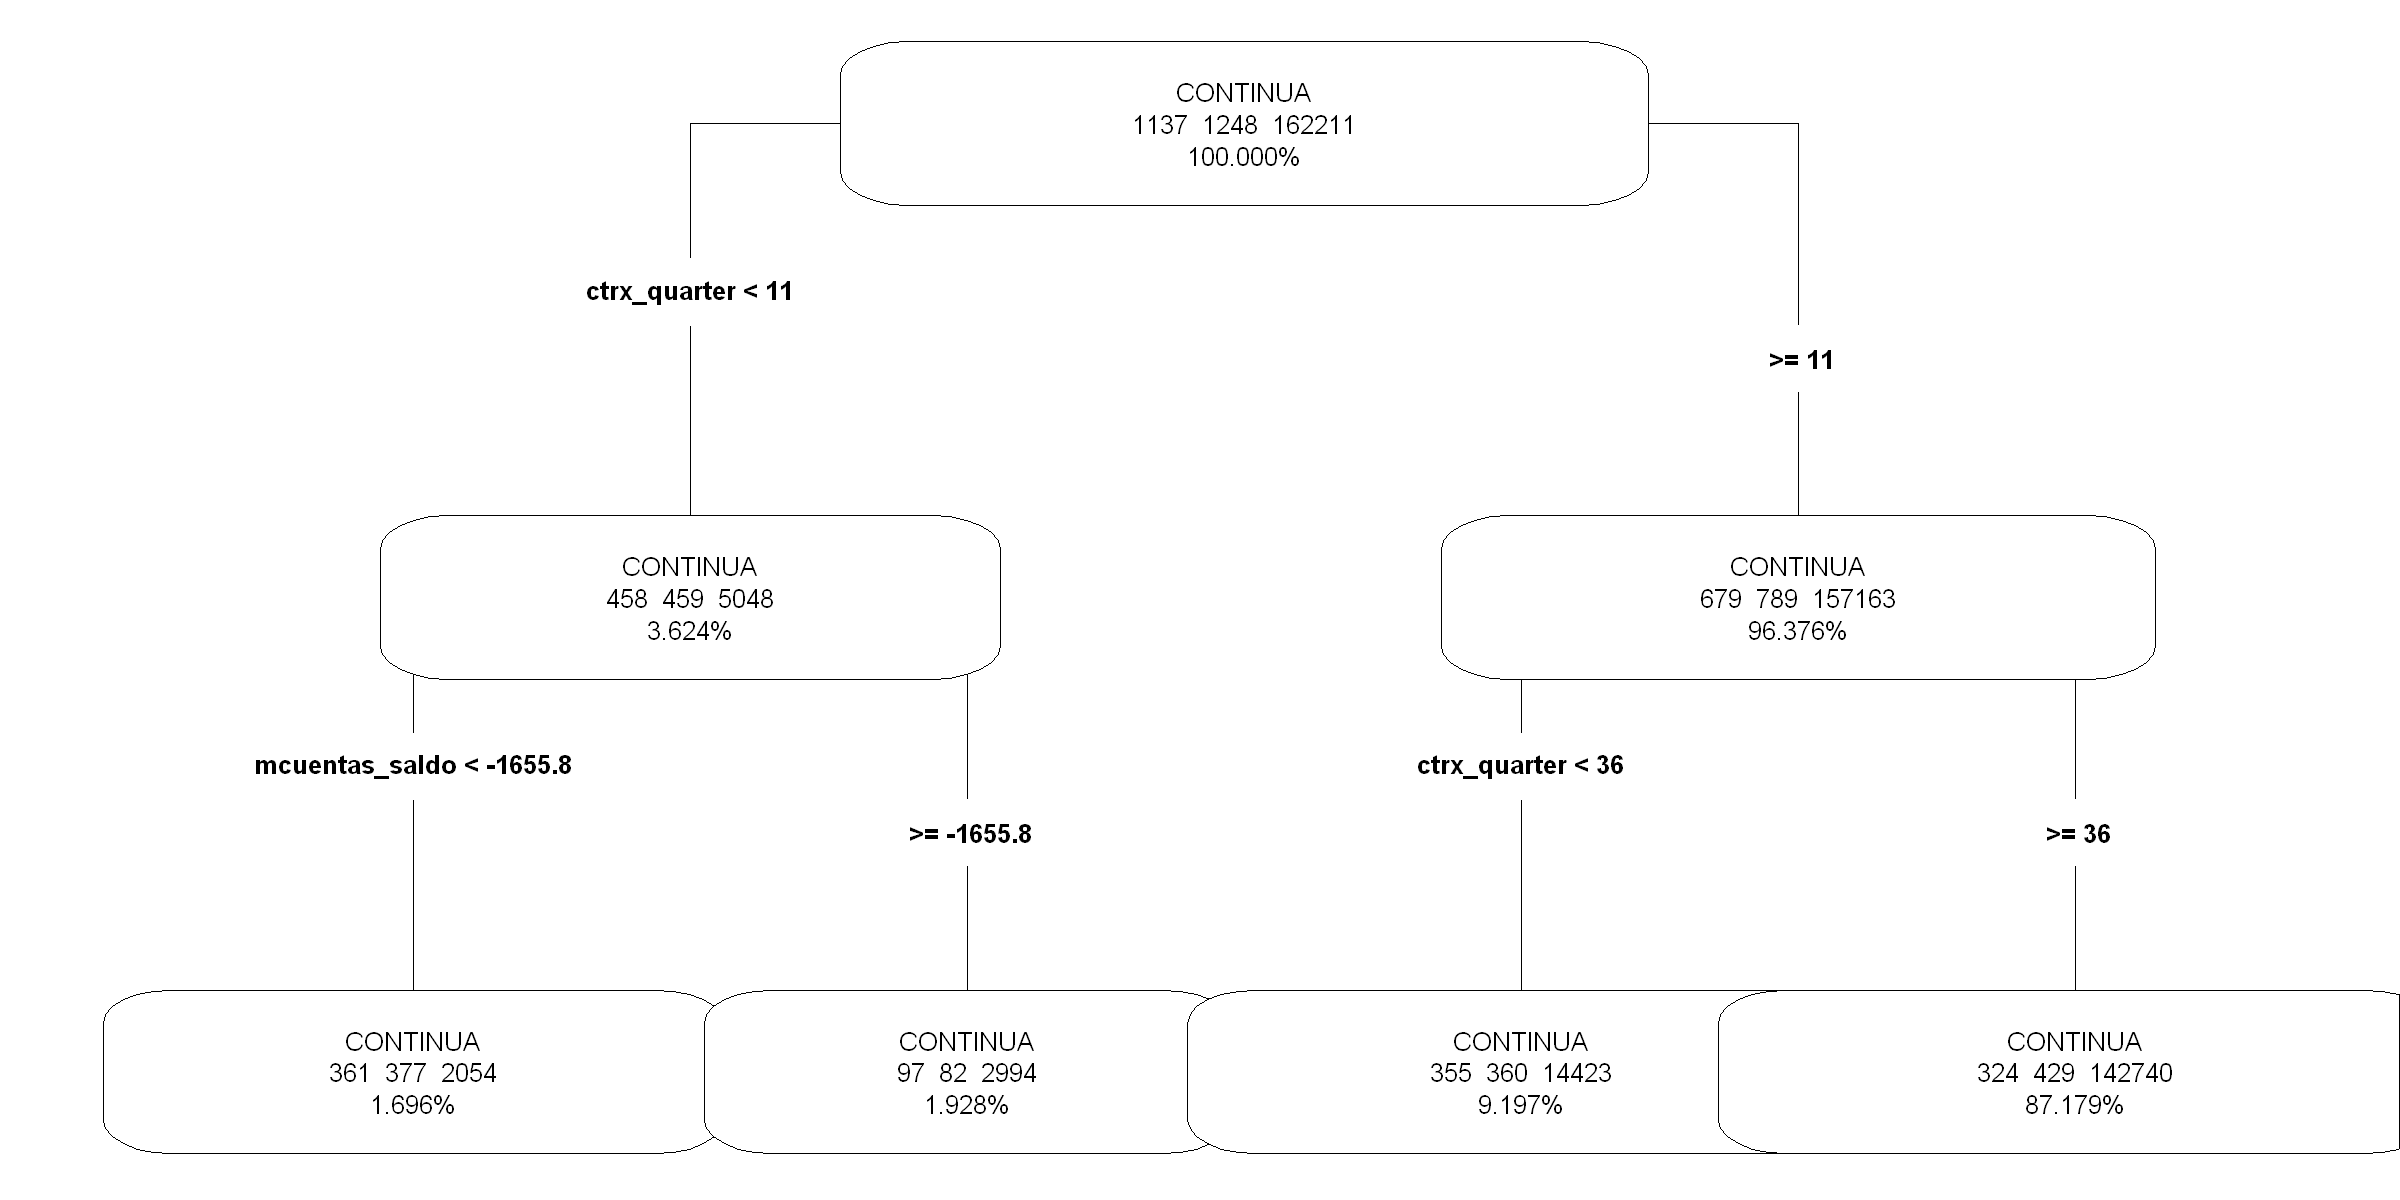

In [34]:
# genero el modelo
modelo <- rpart(
    formula = "clase_ternaria ~ .",
    data = dataset[foto_mes == 202107],
    xval = 0,
    cp = -1,
    maxdepth = 2
)

# imprimo el modelo graficamente
prp(modelo, extra = 101, digits = -5, branch = 1, type = 4, varlen = 0, faclen = 0, tweak = 1.1, cex = 1.2)


**SORPRENDENTE, el arbol de decision es inmune a los outliers**
<br>
El arbol de decisión no ha cambiado. Su forma es exactamente igual, las cantidades en los nodos idéntica al arbol original.
<br>

### Si usted considera que fueron muy conservador convertir en outliers a tan solo 19 registros a que sean outliers, pruebe con  ctrx_quarter > 1000. Probe con 1500! el arbol de decision sigue inmune a outliers!!!!